In [110]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib as mpl

import itertools
from itertools import chain
import pandas as pd

import numpy as np
#import dill

import JM_general_functions as jmf
import JM_custom_figs as jmfig
from JEM_functions import medfilereader

In [143]:
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = ['Arial']
#plt.rcParams.update(IPython_default);
plt.rc('ytick', direction='in')
%matplotlib inline

In [111]:
almost_black = mpl.colors.to_rgb('#262626')

# Casein preference - Test 1

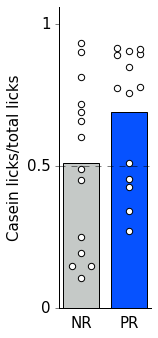

In [154]:
# Casein Preference Test 1

N=1
mNR = (0.51)
mPR = (0.69)
sNR = (0.656092555, 0.488791793, 0.688574939, 0.148148148, 0.450381679, 0.931294118, 0.14650974, 0.106493506, 0.717976319, 0.81238504, 0.192320103, 0.603206413, 0.901275652, 0.25)
sPR = (0.756225426, 0.77647589, 0.913664287, 0.847421422, 0.893170927, 0.775, 0.340226297, 0.269969666, 0.889364872, 0.904622586, 0.912850812, 0.426534769, 0.508424182, 0.453247144)

sc0 = (0, 0, 0, 0.008, 0, 0, -0.008, 0, 0, 0, 0, 0, 0, 0)
sc36 = (0.04, 0.049, 0.03, 0.04, 0.049, 0.03, 0.04, 0.04, 0.03, 0.04, 0.049, 0.04, 0.04, 0.04)

ind = np.arange(N)   
width = 0.03   

fig, ax = plt.subplots(figsize=(2.3, 4.8))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_ylabel('Casein licks/total licks', fontsize=15)

ax.set_xticks([ind, ind+width+0.01])
ax.set_xticklabels(('NR', 'PR'), fontsize=15)

bar1 = ax.bar(ind, mNR,  width, color= 'xkcd:silver',
             align='center', label='NR', edgecolor='black', alpha=1, zorder=-1)

bar2 = ax.bar(ind+width+0.01, mPR, width, color='xkcd:electric blue', 
            align='center', label='PR', edgecolor='black', alpha=1, zorder=-1)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False)        # ticks along the top edge are off
 
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(('0', '0.5', '1'), fontsize=15)
ax.set_ylim([0, 1.06])
plt.tick_params(labelsize=15)
plt.axhline(0.5, color='black', alpha=0.5, linestyle='dashed')
ax.scatter(sc0, sNR, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)
ax.scatter(sc36, sPR, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)  
#plt.title('Casein preference', fontsize=15)
ax.yaxis.tick_left()

ax.tick_params(direction="out")

plt.tight_layout()
plt.savefig('CasPref_Test1.pdf', format='pdf', dpi=800)
plt.show()

# test 1 - licks

In [7]:
metafile= '/Users/giuliachiacchierini/Desktop/IPP paper/metafileIPP2_3.txt'
medfolder= '/Users/giuliachiacchierini/Desktop/IPP paper/MED-PC datafile'


def DataExtract (metafile):
    f = open(metafile, 'r')
    f.seek(0)
    Rows = f.readlines()[1:]
    
    tablerows = []
    for i in Rows:
        tablerows.append(i.split('\t'))
        
        Medfile, Rat, Session, Diet, bottleL, bottleR, licksL, licksR, \
        TotalLicks, IntakeL, IntakeR = [], [], [], [], [], [], [], [], [], [], []
        
    for i, list in enumerate(tablerows):
        Medfile = Medfile + [list[0]]
        Rat = Rat + [list[1]]
        Session = Session + [list[2]]
        Diet = Diet + [list[4]]
        bottleL = bottleL + [list[6]]
        bottleR = bottleR + [list[7]]
        licksL = licksL + [list[8]]
        licksR = licksR + [list[9]]
        TotalLicks = TotalLicks + [list[10]]
        IntakeL = IntakeL + [list[11]]
        IntakeR = IntakeR + [list[12]]
            
    return ({'Medfile':Medfile, 'Rat':Rat, 'Session':Session, \
             'Diet':Diet, 'bottleL':bottleL, 'bottleR':bottleR, 'licksL':licksL, \
             'licksR':licksR, 'TotalLicks':TotalLicks, 'IntakeL':IntakeL, \
             'IntakeR':IntakeR})
    
Data = DataExtract(metafile)

Licks = []
for Medfile in Data['Medfile']:
    Licks.append(medfilereader(medfolder+Medfile,varsToExtract = ['b','e'], remove_var_header = True))

#when it's conditioning, you just have the list TotalLicks
LLicks = []
for l in Licks:
    LLicks.append(len(l[0]))
RLicks = []
for l in Licks:
    RLicks.append(len(l[1]))

#lists of licks 
    
test1_C_NR = []
test1_M_NR = []
test1_C_PR = []
test1_M_PR = []


for rat in np.unique(Data['Rat']): #create a list of the rats in numerical order
    for index, session in enumerate(Data['Session']): #index the position in the Session list
        if session == 's4' :
            if Data['Rat'][index] == rat:
                if 'NR' in Data['Diet'][index]:
                    if 'cas' in Data ['bottleL'][index]:
                        test1_C_NR.append(LLicks[index])
                    if 'cas' in Data ['bottleR'][index]:
                        test1_C_NR.append(RLicks[index])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_NR.append(LLicks[index])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_NR.append(RLicks[index])
                if 'PR' in Data['Diet'][index]:
                    if 'cas' in Data['bottleL'][index]:
                        test1_C_PR.append(LLicks[index])
                    if 'cas' in Data['bottleR'][index]:
                        test1_C_PR.append(RLicks[index])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_PR.append(LLicks[index])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_PR.append(RLicks[index])
                        

av_test1_C_NR = np.mean(test1_C_NR)
av_test1_M_NR = np.mean(test1_M_NR)
av_test1_C_PR = np.mean(test1_C_PR)
av_test1_M_PR = np.mean(test1_M_PR)

width = 0.5    
xvals = [0.5, 1.05, 1.70, 2.25]

fig, ax = plt.subplots(figsize=(3, 5))

fig.set_size_inches((3.5, 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_ylabel('Licks', fontsize=15)
ax.set_xticks([0.7, 1.8])
ax.set_xticklabels(('  Cas  Malt', '     Cas  Malt'), fontsize=10)
plt.xlabel(' NR              PR', fontsize=15)

bar1 = ax.bar(xvals[0], av_test1_C_NR, width, color='xkcd:silver',  
            align='center', label='casein', edgecolor='black', alpha=1, zorder=-1)
bar2 = ax.bar(xvals[1], av_test1_M_NR, width, color='white',
           align='center', label='malto', edgecolor='black', alpha=1, zorder=-1)
bar3 = ax.bar(xvals[2], av_test1_C_PR, width, color='xkcd:electric blue',
           align='center', label='casein', edgecolor='black', alpha=1, zorder=-1)
bar4 = ax.bar(xvals[3], av_test1_M_PR, width, color='xkcd:powder blue',
           align='center', label='malto', edgecolor='black', alpha=1, zorder=-1)

ax.set_ylim([0, 6500])
ax.set_yticks([0, 2000, 4000, 6000])

plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 
       

for y1,y2 in zip(test1_C_NR, test1_M_NR):
    ax.plot([xvals[0], xvals[1]],[y1,y2], c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)
    
for y1,y2 in zip(test1_C_PR, test1_M_PR):
    ax.plot([xvals[2], xvals[3]],[y1,y2],c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)

#leg1 = ax.legend([bar1,bar2, bar3, bar4],['Cas.','Malto.', 'Cas.','Malto.'],  fontsize=9)
#   leg1 = ax.legend([bar1,bar2],['Casein','Maltodextrin'], loc='upper left', fontsize=6)
  #leg2 = ax.legend([bar3,bar4],['Casein','Maltodextrin'], loc='upper right', fontsize=6)
  #ax.add_artist(leg1)

#plt.title('Preference Test', fontsize=15)
plt.tight_layout()
plt.savefig('IPP2-3 test1_licks.pdf', dpi=300)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/giuliachiacchierini/Desktop/IPP paper/MED-PC datafile!2018-10-09_08h18m.Subject IPP2.1'

# saccharin days - licks 

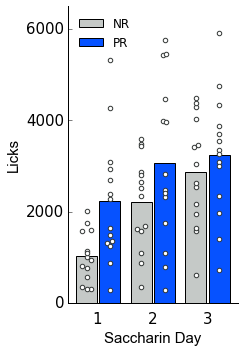

In [156]:
n_groups = 3

av_NR_day1 = [1016]
av_NR_day2 = [2205]
av_NR_day3 = [2870]
NR_day1 = [1584, 1138, 2004, 817, 758, 934, 357, 1600, 567, 1754, 1014, 306, 301, 1088]
NR_day2 = [2873, 2644, 3490, 1622, 1567, 1101, 865, 2516, 2794, 3433, 1677, 337, 2348, 3597]
NR_day3 = [1951, 3421, 1569, 1631, 2535, 4289, 2619, 4031, 3034, 4373, 2171, 602, 4497, 3453]

av_PR_day1 = [2227]
av_PR_day2 = [3070]
av_PR_day3 = [3233]
PR_day1 = [875, 5317, 1303, 2696, 2384, 3082, 1251, 285, 1645, 2933, 1365, 4271, 2279, 1490]
PR_day2 = [2817, 3979, 5429, 2316, 2481, 3961, 786 ,274, 1748, 5447, 2408, 5764, 4467, 1100]
PR_day3 = [3555, 4333, 5923, 3082, 1405, 4744, 3344, 721, 2999, 3707, 1962, 3886, 3267, 2340]

val0 = [0.4, 0.5, 0.5, 0.4, 0.5, 0.6, 0.4, 0.6, 0.5, 0.5, 0.5, 0.6, 0.5, 0.5]
val1 = [1.05, 1.05, 0.99, 1.05, 1.05, 1.05, 1.05, 1.05, 1.05, 1.05, 1.11, 1.05, 1.05, 1.05]
val2 = [1.8, 1.8, 1.8, 1.7, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.9, 1.8, 1.8, 1.8]
val3 = [2.36, 2.32, 2.32, 2.36, 2.36, 2.40, 2.36, 2.36, 2.36, 2.40, 2.36, 2.36, 2.36, 2.36]
val4 = [3.1, 3.05, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.15]
val5 = [3.662, 3.662, 3.662, 3.662, 3.662, 3.662, 3.662, 3.662, 3.662, 3.662, 3.662, 3.662, 3.662, 3.662]

index = np.arange(n_groups)
width = 0.5
xvals = [0.5, 1.05,  1.8, 2.36, 3.1, 3.662]

fig, ax = plt.subplots()
fig.set_size_inches((3.5, 5))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

bar1 = ax.bar(0.5, av_NR_day1,  width, color='xkcd:silver',  
            align='center', label='NR', edgecolor='black', alpha=1, zorder=-1)
bar2 = ax.bar(1.05, av_PR_day1,  width, color='xkcd:electric blue',
           align='center', label='PR', edgecolor='black', alpha=1, zorder=-1)
bar3 = ax.bar(1.8, av_NR_day2,  width, color='xkcd:silver',
           align='center', edgecolor='black', alpha=1, zorder=-1)
bar4 = ax.bar(xvals[3], av_PR_day2, width, color='xkcd:electric blue',
           align='center',  edgecolor='black', alpha=1, zorder=-1)
bar5 = ax.bar(xvals[4], av_NR_day3,  width, color='xkcd:silver',  
            align='center', edgecolor='black', alpha=1, zorder=-1)
bar6 = ax.bar(xvals[5], av_PR_day3,  width, color='xkcd:electric blue',
           align='center', edgecolor='black', alpha=1, zorder=-1)

ax.set_ylim([0, 6500])
ax.set_yticks([0, 2000, 4000, 6000])
ax.set_yticklabels(["0", "2000", "4000", "6000"], fontsize=15)
plt.xlabel('Saccharin Day', fontsize=15, fontname = "Arial")
ax.set_ylabel('Licks', fontsize=15, fontname="Arial")
ax.yaxis.tick_left()

#plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 

plt.xticks((0.76, 2.078,  3.375), ('1', '2', '3'), fontsize=15)

ax.scatter(val0, NR_day1, facecolors=['white'], edgecolors='xkcd:charcoal', s=20, alpha=1, linewidth=1)
ax.scatter(val1, PR_day1, facecolors=['white'], edgecolors='xkcd:charcoal', s=20, alpha=1, linewidth=1)  
ax.scatter(val2, NR_day2, facecolors=['white'], edgecolors='xkcd:charcoal', s=20, alpha=1, linewidth=1)
ax.scatter(val3, PR_day2, facecolors=['white'], edgecolors='xkcd:charcoal', s=20, alpha=1, linewidth=1)  
ax.scatter(val4, NR_day3, facecolors=['white'], edgecolors='xkcd:charcoal', s=20, alpha=1, linewidth=1)
ax.scatter(val5, PR_day3, facecolors=['white'], edgecolors='xkcd:charcoal', s=20, alpha=1, linewidth=1) 

plt.legend(loc='upper left', fontsize=12, frameon=False)

ax.yaxis.tick_left()

plt.rc('ytick', direction='in')

plt.tight_layout()
plt.savefig('saccharin_IPP1-2.pdf', dpi=800)
plt.show()

# time course IPP 2-3

In [90]:
metafile="R:\\DA_and_Reward\\gc214\\IPP2\\metafileIPP2_3.txt"
medfolder="R:\\DA_and_Reward\\gc214\\IPP2\\MED-PC datafile\\"

def DataExtract (metafile):
    f = open(metafile, 'r')
    f.seek(0)
    Rows = f.readlines()[1:]
    
    tablerows = []
    for i in Rows:
        tablerows.append(i.split('\t'))
        
        Medfile, Rat, Session, Diet, bottleL, bottleR, licksL, licksR, \
        TotalLicks, IntakeL, IntakeR = [], [], [], [], [], [], [], [], [], [], []
        
    for i, list in enumerate(tablerows):
        Medfile = Medfile + [list[0]]
        Rat = Rat + [list[1]]
        Session = Session + [list[2]]
        Diet = Diet + [list[4]]
        bottleL = bottleL + [list[6]]
        bottleR = bottleR + [list[7]]
        licksL = licksL + [list[8]]
        licksR = licksR + [list[9]]
        TotalLicks = TotalLicks + [list[10]]
        IntakeL = IntakeL + [list[11]]
        IntakeR = IntakeR + [list[12]]
            
    return ({'Medfile':Medfile, 'Rat':Rat, 'Session':Session, \
             'Diet':Diet, 'bottleL':bottleL, 'bottleR':bottleR, 'licksL':licksL, \
             'licksR':licksR, 'TotalLicks':TotalLicks, 'IntakeL':IntakeL, \
             'IntakeR':IntakeR})
    
Data = DataExtract(metafile)

Licks = []
for Medfile in Data['Medfile']:
    Licks.append(medfilereader(medfolder+Medfile,varsToExtract = ['b','e'], remove_var_header = True))

LLicks2 = []
for l in Licks:
    LLicks2.append(l[0])
RLicks2 = []
for l in Licks:
    RLicks2.append(l[1])

#lists of licks 
    
test1_C_NR = []
test1_M_NR = []
test1_C_PR = []
test1_M_PR = []

data  = pd.read_csv(metafile)


for rat in np.unique(Data['Rat']): #create a list of the rats in numerical order
    for index, session in enumerate(Data['Session']): #index the position in the Session list
        if session == 's4' :
            if Data['Rat'][index] == rat:
                if 'NR' in Data['Diet'][index]:
                    if 'cas' in Data ['bottleL'][index]:
                        test1_C_NR.append(LLicks2[index])
                    if 'cas' in Data ['bottleR'][index]:
                        test1_C_NR.append(RLicks2[index])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_NR.append(LLicks2[index])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_NR.append(RLicks2[index])
                if 'PR' in Data['Diet'][index]:
                    if 'cas' in Data['bottleL'][index]:
                        test1_C_PR.append(LLicks2[index])
                    if 'cas' in Data['bottleR'][index]:
                        test1_C_PR.append(RLicks2[index])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_PR.append(LLicks2[index])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_PR.append(RLicks2[index])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/giuliachiacchierini/Desktop/IPP paper/MED-PC datafile/TEST 1/!2018-10-09_08h18m.Subject IPP2.1'

In [6]:
test1_C_NR_cumsum = []                     
for licklist in test1_C_NR:
    histTemp= np.histogram (licklist, bins=60, range=(0, 3600))[0]
    cumTemp = np.cumsum(histTemp)
    test1_C_NR_cumsum.append(cumTemp)

test1_M_NR_cumsum = []
for licklist in test1_M_NR:
    histTemp= np.histogram (licklist, bins=60, range=(0, 3600))[0]
    cumTemp = np.cumsum(histTemp)
    test1_M_NR_cumsum.append(cumTemp)
    
test1_C_PR_cumsum = []
for licklist in test1_C_PR:
    histTemp= np.histogram (licklist, bins=60, range=(0, 3600))[0]
    cumTemp = np.cumsum(histTemp)
    test1_C_PR_cumsum.append(cumTemp)
    
test1_M_PR_cumsum = []
for licklist in test1_M_PR:
    histTemp= np.histogram (licklist, bins=60, range=(0, 3600))[0]
    cumTemp = np.cumsum(histTemp)
    test1_M_PR_cumsum.append(cumTemp)
    
#df_test1_M_PR = pd.DataFrame(test1_M_PR)
#df_test1_C_PR = pd.DataFrame(test1_C_PR)
#df_test1_C_NR = pd.DataFrame(test1_C_NR)
#df_test1_M_NR = pd.DataFrame(test1_M_NR)
mean_test1_C_NR= np.mean(test1_C_NR_cumsum, axis=0)
mean_test1_M_NR = np.mean(test1_M_NR_cumsum, axis=0)
mean_test1_C_PR = np.mean(test1_C_PR_cumsum, axis=0)
mean_test1_M_PR = np.mean(test1_M_PR_cumsum, axis=0)
#mean_test1_M_NR = df_test1_M_NR.mean(axis=0)
#mean_test1_C_PR = df_test1_C_PR.mean(axis=0)
#mean_test1_M_PR = df_test1_M_PR.mean(axis=0)


nRats = len(test1_C_NR_cumsum)
sem_test1_C_NR= np.std(test1_C_NR_cumsum, axis=0)/np.sqrt(nRats)
sem_test1_M_NR = np.std(test1_M_NR_cumsum, axis=0)/np.sqrt(nRats)
sem_test1_C_PR = np.std(test1_C_PR_cumsum, axis=0)/np.sqrt(nRats)
sem_test1_M_PR = np.std(test1_M_PR_cumsum, axis=0)/np.sqrt(nRats)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

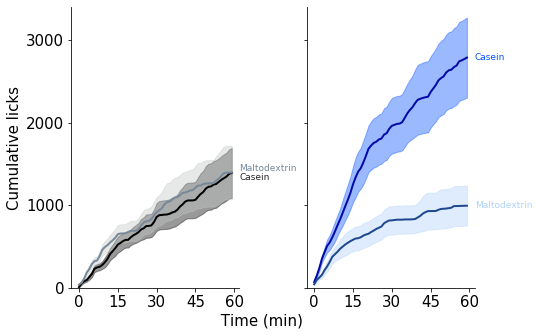

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(6, 5), sharex = True, sharey=True)
fig.subplots_adjust(top=0.85, bottom=0.2, left=0.15, right=0.95, wspace=0.4)

fig.set_size_inches((7, 6))

axs[0].spines["right"].set_visible(False)
axs[1].spines["right"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[1].spines["top"].set_visible(False)

linewidth=2
hist1=axs[0].plot(mean_test1_C_NR,  color="black", label='Casein', linewidth=linewidth)
hist2= axs[0].plot(mean_test1_M_NR,   color='lightslategray',  label='Maltodextrin', linewidth=linewidth)
hist3= axs[1].plot(mean_test1_C_PR,   color='#030aa7',  label='Casein', linewidth=linewidth)
hist4= axs[1].plot(mean_test1_M_PR,   color='#1e488f',  label='Maltodextrin', linewidth=linewidth)

x=np.arange(60)
y=mean_test1_C_NR
yerror=sem_test1_C_NR
errorpatch = axs[0].fill_between(x, y-yerror, y+yerror, color='black', alpha=0.4)

y=mean_test1_M_NR
yerror=sem_test1_M_NR
errorpatch = axs[0].fill_between(x, y-yerror, y+yerror, color='xkcd:silver', alpha=0.4)

y=mean_test1_C_PR
yerror=sem_test1_C_PR
errorpatch = axs[1].fill_between(x, y-yerror, y+yerror, color='xkcd:electric blue', alpha=0.4)

y=mean_test1_M_PR
yerror=sem_test1_M_PR
errorpatch = axs[1].fill_between(x, y-yerror, y+yerror, color='xkcd:powder blue', alpha=0.4)


axs[0].set_ylabel('Cumulative licks', fontsize=15)
axs[0].set_xlabel('                                             Time (min)', fontsize=15)
#axs[1].set_xlabel('Time (min)', fontsize=20)

plt.xticks([0, 15, 30, 45, 60], ["0", "15", "30", "45", "60"], fontsize=15)
#axs[0].set_xlim([0,12])
axs[0].set_ylim([0,3400])
plt.yticks([0, 1000, 2000, 3000], fontsize=15)
#axs[1].tick_params(top='off', bottom='on', left='on', right='off', labelleft='off', labelbottom='on', labelsize=20)
axs[0].tick_params( labelsize=15)
axs[1].tick_params( labelsize=15)


axs[0].text(62, max(mean_test1_C_NR), 'Casein', va='top', color=almost_black, fontsize=9)
axs[0].text(62, max(mean_test1_M_NR), 'Maltodextrin', va='bottom', color='lightslategray', fontsize=9)
axs[1].text(62, max(mean_test1_C_PR), 'Casein', va='center', color='xkcd:electric blue', fontsize=9)
axs[1].text(62, max(mean_test1_M_PR), 'Maltodextrin', va='center', color='xkcd:powder blue', fontsize=9)

fig.savefig('Timecourse_IPP day 1.eps', dpi=800, bbox_inches='tight')

# casein preference - 5 days

/Users/giuliachiacchierini/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/Users/giuliachiacchierini/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:77: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


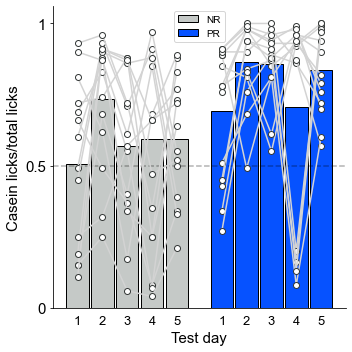

In [72]:
NR_test1 = [0.66, 0.49, 0.69, 0.15, 0.45, 0.93, 0.15, 0.11, 0.72, 0.81, 0.19, 0.60, 0.90, 0.25]
NR_test2 = [0.49, 0.93, 0.83, 0.68, 0.91, 0.96, 0.25, 0.90, 0.74, 0.62, 0.91, 0.88, 0.87, 0.32]
NR_test3 = [0.37, 0.71, 0.55, 0.40, 0.88, 0.72, 0.06, 0.86, 0.88, 0.17, 0.87, 0.34, 0.61, 0.57]
NR_test4 = [0.08, 0.91, 0.07, 0.85, 0.25, 0.35, 0.04, 0.88, 0.47, 0.68, 0.66, 0.25, 0.97, 0.66]
NR_test5 = [0.34, 0.50, 0.73, 0.33, 0.88, 0.83, 0.21, 0.39, 0.52, 0.89, 0.77, 0.64, 0.55, 0.72]

PR_test1 = [0.76, 0.78, 0.91, 0.85, 0.89, 0.78, 0.34, 0.27, 0.89, 0.90, 0.91, 0.43, 0.51, 0.45]
PR_test2 = [0.98, 0.98, 1.00, 0.81, 0.98, 0.84, 0.83, 0.76, 0.49, 0.90, 0.99, 0.94, 0.68, 0.94]
PR_test3 = [0.94, 0.85, 1.00, 0.55, 0.93, 0.87, 0.61, 0.89, 0.81, 0.98, 0.96, 0.88, 0.81, 0.91]
PR_test4 = [0.99, 0.92 ,0.20 ,0.93, 0.93, 0.16, 0.96, 0.86, 0.94, 0.87, 0.98, 0.96, 0.08, 0.13]
PR_test5 = [0.70, 0.99, 0.98, 1.00, 0.82, 1.00, 0.94, 0.72, 0.79, 0.57, 0.76, 0.90, 0.60, 0.97]

av_NR_test1 = [0.5067]
av_NR_test2 = [0.7349]
av_NR_test3 = [0.5704]
av_NR_test4 = [0.5935]
av_NR_test5 = [0.5935]

av_PR_test1 = [0.6905]
av_PR_test2 = [0.8656]
av_PR_test3 = [0.8563]
av_PR_test4 = [0.7079]
av_PR_test5 = [0.838]

err_NR_test1 = [0.07864]
err_NR_test2 = [0.06254]
err_NR_test3 = [0.07225]
err_NR_test4 = [0.08942]
err_NR_test5 = [0.0586]

err_PR_test1 = [0.06324]
err_PR_test2 = [0.03912]
err_PR_test3 = [0.0348]
err_PR_test4 = [0.09977]
err_PR_test5 = [0.04018]

width = 0.5    
xvals = [0.5, 1.05, 1.6, 2.15, 2.7, 3.7, 4.25, 4.8, 5.35, 5.9]

fig, ax = plt.subplots()
fig.set_size_inches((5, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_ylabel('Casein licks/total licks', fontsize=15)


bar1 = ax.bar(xvals[0], av_NR_test1,  width, color='xkcd:silver',  
            align='center', label='Non-restricted', edgecolor='black', alpha=1, zorder=-1) #, yerr=err_NR_test1)
bar2 = ax.bar(xvals[1], av_NR_test2,  width, color='xkcd:silver',
           align='center', label='Non-restricted', edgecolor='black', alpha=1, zorder=-1) #, yerr=err_NR_test2)
bar3 = ax.bar(xvals[2], av_NR_test3,  width, color='xkcd:silver',
           align='center', label='Non-restricted', edgecolor='black', alpha=1, zorder=-1) #, yerr=err_NR_test3)
bar4 = ax.bar(xvals[3], av_NR_test4, width, color='xkcd:silver',
           align='center', label='Non-restricted', edgecolor='black', alpha=1, zorder=-1) #, yerr=err_NR_test4)
bar5 = ax.bar(xvals[4], av_NR_test5, width, color='xkcd:silver',
           align='center', label='Non-restricted', edgecolor='black', alpha=1, zorder=-1) #, yerr=err_NR_test5)

bar6 = ax.bar(xvals[5], av_PR_test1,  width, color='xkcd:electric blue',
           align='center', label='Protein-restricted', edgecolor='black', alpha=1, zorder=-1) #, yerr=err_PR_test1)
bar7 = ax.bar(xvals[6], av_PR_test2,  width, color='xkcd:electric blue',
           align='center', label='Protein-restricted', edgecolor='black', alpha=1, zorder=-1) #, yerr=err_PR_test2)
bar8 = ax.bar(xvals[7], av_PR_test3, width, color='xkcd:electric blue',
           align='center', label='Protein-restricted', edgecolor='black', alpha=1, zorder=-1) #, yerr=err_PR_test3)
bar9 = ax.bar(xvals[8], av_PR_test4,  width, color='xkcd:electric blue',
           align='center', label='Protein-restricted', edgecolor='black', alpha=1, zorder=-1) #, yerr=err_PR_test4)
bar10 = ax.bar(xvals[9], av_PR_test5,  width, color='xkcd:electric blue',
           align='center', label='Protein-restricted', edgecolor='black', alpha=1, zorder=-1) #, yerr=err_PR_test5)

for y1,y2,y3,y4,y5 in zip(NR_test1, NR_test2, NR_test3, NR_test4, NR_test5):
    ax.plot([xvals[0], xvals[1], xvals[2], xvals[3], xvals[4]],[y1,y2, y3, y4, y5], c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)
    
for y1,y2,y3,y4,y5 in zip(PR_test1, PR_test2, PR_test3, PR_test4, PR_test5):
    ax.plot([xvals[5], xvals[6], xvals[7], xvals[8], xvals[9]],[y1,y2, y3, y4, y5],c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)     


ax.set_ylim([0, 1.06])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(('0', '0.5', '1'), fontsize=15)
ax.set_xticklabels([])
plt.axhline(0.5, color='black', alpha=0.3, linestyle='dashed')
plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 
ax.set_xticks([0.5, 1.05, 1.6, 2.15, 2.7, 3.7, 4.25, 4.8, 5.35, 5.9])
ax.set_xticklabels(('1', '2', '3', '4', '5', '1', '2', '3', '4', '5'), fontsize=13, fontname = "Arial")
ax.set_xlabel('Test day', fontsize=15, fontname = "Arial")
plt.legend((bar1, bar6), ("NR", "PR"), loc='best')
#plt.title('Preference Test', fontsize=15)
plt.tight_layout()
plt.savefig('IPP2-3_cas pref_5tests.pdf', dpi=300)
plt.show()

# trial for time course palatability

In [362]:
medfolder = "R:\\DA_and_Reward\\gc214\\IPP2\\MED-PC datafile\\"
metafile="Z:\\IPP paper\\palatability_IPP2-3_metafile.txt"
medfile = medfolder + '!2019-02-27_08h30m.Subject IPP3.7'        #use this if I want to calculate one rat at the time



varsToExtract = 'e'                                              #use this if I want to calculate one side at the time

# b = left
# e = right

In [20]:
# this bit has to be changed according to the metafile

#def DataExtract (metafile):
    #f = open(metafile, 'r')
    #f.seek(0)
    #Rows = f.readlines()[1:]
    
    #tablerows = []
    #for i in Rows:
        #tablerows.append(i.split('\t'))
        
        #Medfile, Rat, Session, Diet, bottleL, bottleR, LXCL, LXCR = [], [], [], [], [], [], [], []
        
    #for i, list in enumerate(tablerows):
        #Medfile = Medfile + [list[0]]
        #Rat = Rat + [list[1]]
        #Session = Session + [list[2]]
        #Diet = Diet + [list[3]]
        #bottleL = bottleL + [list[4]]
        #bottleR = bottleR + [list[5]]
        #LXCL = LXCL + [list[6]]
        #LXCR = LXCR + [list[7]]
        
            
    #return ({'Medfile':Medfile, 'Rat':Rat, 'Session':Session, \
             #'Diet':Diet, 'bottleL':bottleL, 'bottleR':bottleR, 'LXCL':LXCL, 'LXCR':LXCR})
    
#Data = DataExtract(metafile)

In [22]:
# this divides licks into left and right
#LLicks = []
#for l in licks:
    #LLicks.append(l[0])
#RLicks = []
#for l in licks:
    #RLicks.append(l[1])

In [4]:
#lickdataL = lickCalc(LLicks) 
#lickdataR = lickCalc(RLicks)

In [ ]:
#lists of licks 
    
#test1_C_NR = []
#test1_M_NR = []
#test1_C_PR = []
#test1_M_PR = []

In [17]:
#data  = pd.read_csv(metafile)

In [363]:
licks = medfilereader(medfile, varsToExtract=varsToExtract, remove_var_header=True)

In [364]:
lickdata = lickCalc(licks)

In [366]:
#print(lickdata['bTime']) 
#sum(lickdata['bLicks'])
#len(lickdata['bNum'])
print(lickdata['bNum'])

44


In [35]:
bLicks = []
bLicks.append(lickdata['bLicks'])
print(bLicks)
np.savetxt('file.txt',  np.column_stack(bLicks), fmt='%1.3f')

[array([ 40,   9,  13,  35,  27,   7,  14,  31,  17,  23,   4,   2,  19,
         5,   2,   5,  18,   2,   1,   2,  17,   1,   4,  12,   2,   1,
         9,   1,   8,   4,   3,   3,   8,   2,   8,   3,   5,   1,   1,
         3,  23,   5,  12,   2,   4,   1,   3,   3,   2,   3,  18,   8,
         6,  14,   1,   4,  40, 406,  14,   1,   1,  28,   5,  13,  10,
        11,  12,   1,  16,  17,  11,   4,   9,   3,  24,   2,  11,  16,
        14,   3,   7,   3,   1,   5, 256,  11, 209,  22, 176,   8, 124,
        69,   6,  37,   1,  57,   5,  76,  10, 219, 101, 113,   2,   2,
         1,  55,  91,  11,  40, 197,   6,   8,   9,  43,   6,  11,  17,
         9,   1,   8,  11,   9,   2, 167,   8,  18, 444,  82, 140,   3,
         2, 230,  86, 115, 187,   2, 127,   7,  31,  54,   3, 189,   2,
        40,   3, 123,  11,  73,  70,  11,   7,   3,  19,  16,   8, 135,
        30, 154,   9,  19, 102,   4,  59,  92, 178,  16, 330,   9, 279,
         3,  89, 104,  43,   3, 429, 363,   1, 106, 292,  38, 1

In [19]:
#hist = np.histogram (lickdata['bLicks'], bins=12, range=(0, 3600))
hist_list = []
hist_list.append(np.histogram (lickdata['bLicks'], bins=12, range=(0, 3600)))

ValueError: setting an array element with a sequence.

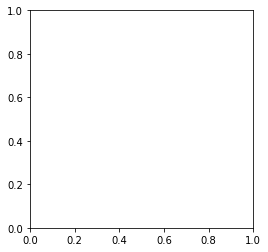

In [21]:
fig, ax= plt.subplots(1, 1, figsize=(4, 4))
hist1 = ax.plot(hist_list, color="black")


# cluster size rat per rat

In [258]:
medfolder = "R:\\DA_and_Reward\\gc214\\IPP2\\MED-PC datafile\\"
metafile="Z:\\IPP paper\\palatability_IPP2-3_metafile.txt"
medfile = medfolder + '!2019-02-25_10h53m.Subject IPP3.12'        #use this if I want to calculate one rat at the time



varsToExtract = 'b'                                              #use this if I want to calculate one side at the time

# b = left
# e = right

In [259]:
licks = medfilereader(medfile, varsToExtract=varsToExtract, remove_var_header=True)
lickdata = lickCalc(licks)


In [260]:
print(lickdata['bLicks'])

[40 15  2 10 16  5  9 10 13  7  3 21 13  4  2  4  1  1  1  3  2  1  1 17
  9  8  5 12 12 19 10 10 28 11 11  8  6  6  5  3 11  9  1  1 31 10 10 31
 12 12  9  8 10 38 10 12  3  2  8 20  6  7 24  7  9 12  7  3 24  2  5  3
 33  2 28 23  3  1  1  6  4  3 19  1  1  3  1 33 20 23 15  8 22 24 18  6
  4  1 13  2  3  1  1  1  2  3  3  3  1 11  9 15  7  9  2 15 20 14  6  1
  8  1  1  1  1  2  2  3  2  3  3  3  1  2  4  2 29  3  1  1  1  2  1  1
  1  1 25 31 34 43 13  9  9 19 15 11 16 14 16 26 11 21 29 43 29 24 12 11
 23  8  2  1  1  2  1  4  1  4 11 28 41  5 29 23 55 25 15  9 19 49 21 19
 36 17 14 34 32 16 31 16 11  8 19  5  3  8  1 15  3  4 86 23 30 19 99 33
 26 26 10 19  1  1  1 24 22  1  5  2 20  1 28 13 13 21 22 23  9 17 18 20
  2  2  2]


In [261]:
bLicks = []
bLicks.append(lickdata['bLicks'])
np.savetxt('file.txt',  np.column_stack(bLicks), fmt='%1.3f' )


# Cluster size: first 3 and last 3 clusters - Test 1 - NR rats

/Users/giuliachiacchierini/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/Users/giuliachiacchierini/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


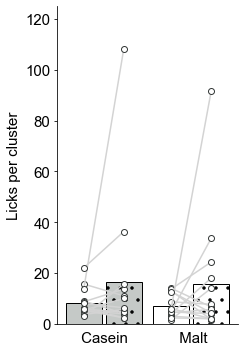

In [15]:
av_NR_C_first = [8.36]
av_NR_C_last = [16.36]
av_NR_M_first = [7.05]
av_NR_M_last = [15.55]

NR_C_first = [15.67, 6.33, 5.00, 9.00, 3.67, 8.67, 5.67, 5.33, 3.00, 13.67, 5.33, 5.67, 22.00, 8.00]
NR_C_last = [11.00, 2.33, 4.00, 4.00, 5.67, 13.67, 4.67, 10.00, 15.67, 108.33, 2.33, 4.67, 36.33, 6.33]
NR_M_first = [14.00, 4.00, 13.00, 13.67, 4.67, 8.67, 1.67, 6.00, 3.00, 4.33, 4.67, 2.33, 6.00, 12.67]
NR_M_last = [6.67, 18.00, 1.67, 24.33, 4.00, 7.67, 14.00, 91.67, 2.00, 5.67, 33.67, 2.00, 2.00, 4.33]

fig, ax = plt.subplots(figsize=(3.5, 5))
width = 0.5    
xvals = [0.5, 1.05, 1.70, 2.25]
fig.set_size_inches((3.5, 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_ylabel('Licks per cluster', fontsize=15)

ax.set_xticks([0.75, 1.95])

ax.set_xticklabels((' Casein', '  Malt'), fontsize=15)

bar1 = ax.bar(xvals[0], av_NR_C_first, width, color='xkcd:silver',  
            align='center', label='first 3', edgecolor='black', alpha=1, zorder=-1)
bar2 = ax.bar(xvals[1], av_NR_C_last, width, color='xkcd:silver',
           align='center', label='last 3', edgecolor='black', alpha=1, zorder=-1, hatch=".")
bar3 = ax.bar(xvals[2], av_NR_M_first, width, color='white',
           align='center', label='first 3', edgecolor='black', alpha=1, zorder=-1)
bar4 = ax.bar(xvals[3], av_NR_M_last, width, color='white',
           align='center', label='last 3', edgecolor='black', alpha=1, zorder=-1, hatch=".")

ax.set_ylim([0, 125])
#ax.set_yticks([0, 2000, 4000, 6000])

plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 
       

for y1,y2 in zip(NR_C_first, NR_C_last):
    ax.plot([xvals[0], xvals[1]],[y1,y2], c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)
    
for y1,y2 in zip(NR_M_first, NR_M_last):
    ax.plot([xvals[2], xvals[3]],[y1,y2],c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)


#leg1 = ax.legend([bar1,bar2],['First 3','Last 3'], loc='upper left', fontsize=10, frameon=False)
#leg2 = ax.legend([bar3,bar4],['First 3','last 3'], loc='upper right', fontsize=10, frameon=False)
#ax.add_artist(leg1)

#plt.title('Non-restricted', fontsize=15)
plt.tight_layout()
#plt.savefig('First-last 3 clusters_NR.pdf', dpi=300)
plt.show()

# Cluster size: first 3 and last 3 clusters - Test 1 - NR and PR

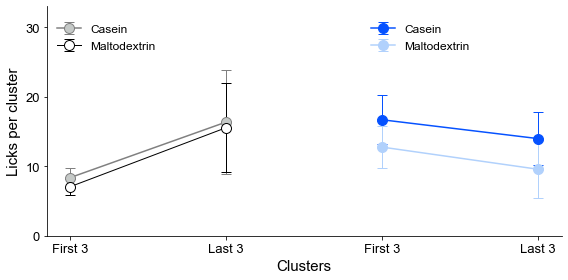

In [16]:
av_NR_cas = [8.36, 16.36]
av_NR_mal = [7.05, 15.55]
av_PR_cas = [16.69, 13.98]
av_PR_mal = [12.76, 9.57]

sem_NR_cas = [1.42, 7.46]
sem_NR_mal= [1.19, 6.40]
sem_PR_cas = [3.51, 3.77]
sem_PR_mal = [2.99, 4.07]


fig1a=plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 1, 1)

x1 = (0, 1)
x2 = (2, 3)

p1=plt.errorbar(x1, av_NR_cas, yerr=sem_NR_cas, color='grey', marker='o', markerfacecolor='xkcd:silver', markersize=10, elinewidth=1, capsize=5)
p2=plt.errorbar(x1, av_NR_mal, yerr=sem_NR_mal, color='black',  marker='o',  markerfacecolor='white', markersize=10, elinewidth=1, capsize=5, linewidth=1)
p3=plt.errorbar(x2, av_PR_cas, yerr=sem_PR_cas, color='xkcd:electric blue',  marker='o',  markerfacecolor='xkcd:electric blue', markersize=10, elinewidth=1, capsize=5)
p4=plt.errorbar(x2, av_PR_mal, yerr=sem_PR_mal, color='xkcd:powder blue',  marker='o',  markerfacecolor='xkcd:powder blue', markersize=10, elinewidth=1, capsize=5)

ax.set_ylabel("Licks per cluster", fontsize=15)
ax.set_xlabel("Clusters", fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.tick_params(labelsize=13)
leg1 = ax.legend([p1, p2],['Casein', 'Maltodextrin'], loc=(0.01, 0.785), fontsize=12, frameon=False)
leg2 = ax.legend([p3, p4], ['Casein', 'Maltodextrin'], loc=(0.62, 0.785), fontsize=12, frameon=False)
ax.add_artist(leg1)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(('First 3', 'Last 3', 'First 3', 'Last 3'), fontsize=13)
ax.set_yticks([0, 10, 20, 30])
ax.set_ylim(0, 33)

plt.tight_layout()
#plt.savefig('first-last 3 clusters_line.pdf', dpi=300)
plt.show()

# CLUSTER SIZE: FIRST 3 AND LAST 3 CLUSTERS (WITHOUT VERY FIRST AND VERY LAST CLUSTER) - NR and PR

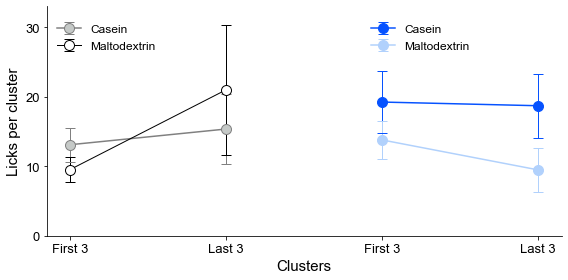

In [7]:
av_NR_cas = [13.10, 15.36]
av_NR_mal = [9.52, 21]
av_PR_cas = [19.24, 18.71]
av_PR_mal = [13.79, 9.48]

sem_NR_cas = [2.46, 5.09]
sem_NR_mal= [1.79, 9.33]
sem_PR_cas = [4.52, 4.61]
sem_PR_mal = [2.74, 3.17]


fig1a=plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 1, 1)

x1 = (0, 1)
x2 = (2, 3)

p1=plt.errorbar(x1, av_NR_cas, yerr=sem_NR_cas, color='grey', marker='o', markerfacecolor='xkcd:silver', markersize=10, elinewidth=1, capsize=5)
p2=plt.errorbar(x1, av_NR_mal, yerr=sem_NR_mal, color='black',  marker='o',  markerfacecolor='white', markersize=10, elinewidth=1, capsize=5, linewidth=1)
p3=plt.errorbar(x2, av_PR_cas, yerr=sem_PR_cas, color='xkcd:electric blue',  marker='o',  markerfacecolor='xkcd:electric blue', markersize=10, elinewidth=1, capsize=5)
p4=plt.errorbar(x2, av_PR_mal, yerr=sem_PR_mal, color='xkcd:powder blue',  marker='o',  markerfacecolor='xkcd:powder blue', markersize=10, elinewidth=1, capsize=5)

ax.set_ylabel("Licks per cluster", fontsize=15)
ax.set_xlabel("Clusters", fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.tick_params(labelsize=13)
leg1 = ax.legend([p1, p2],['Casein', 'Maltodextrin'], loc=(0.01, 0.785), fontsize=12, frameon=False)
leg2 = ax.legend([p3, p4], ['Casein', 'Maltodextrin'], loc=(0.62, 0.785), fontsize=12, frameon=False)
ax.add_artist(leg1)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(('First 3', 'Last 3', 'First 3', 'Last 3'), fontsize=13)
ax.set_yticks([0, 10, 20, 30])
ax.set_ylim(0, 33)

plt.tight_layout()
plt.savefig('first-last 3 clusters_line_2nd version.pdf', dpi=300)
plt.show()

# CLUSTER SIZE: first THIRD vs last THIRD (WITHOUT VERY FIRST AND VERY LAST CLUSTER) - NR and PR

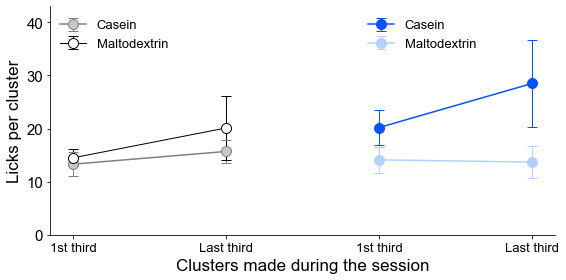

In [15]:
av_NR_cas = [13.29, 15.68]
av_NR_mal = [14.48, 20.10]
av_PR_cas = [20.18, 28.48]
av_PR_mal = [14.10, 13.68]

sem_NR_cas = [2.20, 2.22]
sem_NR_mal= [1.59, 6.08]
sem_PR_cas = [3.29, 8.26]
sem_PR_mal = [2.49, 3.01]


fig1a=plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 1, 1)

x1 = (0, 1)
x2 = (2, 3)

p1=plt.errorbar(x1, av_NR_cas, yerr=sem_NR_cas, color='grey', marker='o', markerfacecolor='xkcd:silver', markersize=10, elinewidth=1, capsize=5)
p2=plt.errorbar(x1, av_NR_mal, yerr=sem_NR_mal, color='black',  marker='o',  markerfacecolor='white', markersize=10, elinewidth=1, capsize=5, linewidth=1)
p3=plt.errorbar(x2, av_PR_cas, yerr=sem_PR_cas, color='xkcd:electric blue',  marker='o',  markerfacecolor='xkcd:electric blue', markersize=10, elinewidth=1, capsize=5)
p4=plt.errorbar(x2, av_PR_mal, yerr=sem_PR_mal, color='xkcd:powder blue',  marker='o',  markerfacecolor='xkcd:powder blue', markersize=10, elinewidth=1, capsize=5)

ax.set_ylabel("Licks per cluster", fontsize=17)
ax.set_xlabel("Clusters made during the session", fontsize=17)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.tick_params(labelsize=15)
leg1 = ax.legend([p1, p2],['Casein', 'Maltodextrin'], loc=(0.01, 0.785), fontsize=13, frameon=False)
leg2 = ax.legend([p3, p4], ['Casein', 'Maltodextrin'], loc=(0.62, 0.785), fontsize=13, frameon=False)
ax.add_artist(leg1)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(('1st third', 'Last third', '1st third', 'Last third'), fontsize=13)
ax.set_yticks([0, 10, 20, 30, 40])
ax.set_ylim(0, 43)

plt.tight_layout()
plt.savefig('first-last THIRD.pdf', dpi=300)
plt.show()

# CLUSTER SIZE: first THIRD vs last THIRD (WITHOUT VERY FIRST AND VERY LAST CLUSTER) - NR and PR - without outliers

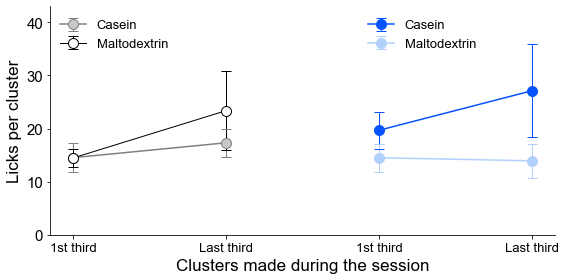

In [13]:
av_NR_cas = [14.51, 17.31]
av_NR_mal = [14.45, 23.36]
av_PR_cas = [19.67, 27.11]
av_PR_mal = [14.50, 13.92]

sem_NR_cas = [2.67, 2.61]
sem_NR_mal= [1.75, 7.48]
sem_PR_cas = [3.51, 8.80]
sem_PR_mal = [2.65, 3.25]


fig1a=plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 1, 1)

x1 = (0, 1)
x2 = (2, 3)

p1=plt.errorbar(x1, av_NR_cas, yerr=sem_NR_cas, color='grey', marker='o', markerfacecolor='xkcd:silver', markersize=10, elinewidth=1, capsize=5)
p2=plt.errorbar(x1, av_NR_mal, yerr=sem_NR_mal, color='black',  marker='o',  markerfacecolor='white', markersize=10, elinewidth=1, capsize=5, linewidth=1)
p3=plt.errorbar(x2, av_PR_cas, yerr=sem_PR_cas, color='xkcd:electric blue',  marker='o',  markerfacecolor='xkcd:electric blue', markersize=10, elinewidth=1, capsize=5)
p4=plt.errorbar(x2, av_PR_mal, yerr=sem_PR_mal, color='xkcd:powder blue',  marker='o',  markerfacecolor='xkcd:powder blue', markersize=10, elinewidth=1, capsize=5)

ax.set_ylabel("Licks per cluster", fontsize=17)
ax.set_xlabel("Clusters made during the session", fontsize=17)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.tick_params(labelsize=15)
leg1 = ax.legend([p1, p2],['Casein', 'Maltodextrin'], loc=(0.01, 0.785), fontsize=13, frameon=False)
leg2 = ax.legend([p3, p4], ['Casein', 'Maltodextrin'], loc=(0.62, 0.785), fontsize=13, frameon=False)
ax.add_artist(leg1)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(('1st third', 'Last third', '1st third', 'Last third'), fontsize=13)
ax.set_yticks([0, 10, 20, 30, 40])
ax.set_ylim(0, 43)

plt.tight_layout()
plt.savefig('first-last THIRD_without outliers.pdf', dpi=300)
plt.show()

# correlation CAS PREF vs. % CHANGE IN PALATABILITY - NR and PR

In [5]:
from numpy.polynomial.polynomial import polyfit

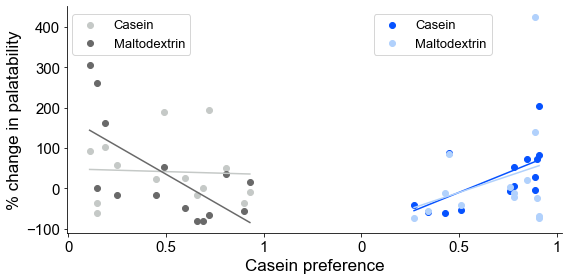

In [19]:
fig1a=plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 1, 1)

NR_cas_pref = [0.66+1, 0.49+1, 0.69+1, 0.15+1, 0.45+1, 0.93+1, 0.15+1, 0.11+1, 0.72+1, 0.81+1, 0.19+1, 0.60+1, 0.90+1, 0.25+1]
NR_change_cas = [-17.06, 188.55, 0.00, -35.85, 24.07, -9.28, -61.15, 91.30, 195.29, 50.12, 102.55, 25.35, -35.99, 58.82]
NR_change_mal = [-80.84, 51.93, -82.20, 0.94, -17.92, 16.13, 261.96, 305.74, -65.92, 34.87, 160.70, -50.00, -55.71, -16.95]
PR_cas_pref = [0.76+2.5, 0.78+2.5, 0.91+2.5, 0.85+2.5, 0.89+2.5, 0.78+2.5, 0.34+2.5, 0.27+2.5, 0.89+2.5, 0.90+2.5, 0.91+2.5, 0.43+2.5, 0.51+2.5, 0.45+2.5]
PR_change_cas = [-5.95, 52.16, 204.66, 72.69, -5.57, 5.16, -59.68, -42.39, 28.62, 73.40, 82.46, -60.60, -53.36, 87.90]
PR_change_mal = [3.12, -12.05, -70.04, 19.39, 139.25, -21.89, -56.15, -74.79, 425.71, -24.32, -73.44, -12.82, -42.11, 86.18]

p1 = ax.scatter(NR_cas_pref, NR_change_cas, c= "xkcd:silver")
p2 = ax.scatter(NR_cas_pref, NR_change_mal, c="dimgray")
p3 = ax.scatter(PR_cas_pref, PR_change_cas, c='xkcd:electric blue')
p4 = ax.scatter(PR_cas_pref, PR_change_mal, c='xkcd:powder blue')

ax.set_ylabel("% change in palatability", fontsize=17)
ax.set_xlabel("Casein preference", fontsize=17)
plt.xticks([1, 1.5, 2, 2.5, 3, 3.5], ["0", "0.5",  "1",  "0", "0.5", "1"], fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.tick_params(labelsize=15)

b, m = polyfit(NR_cas_pref, NR_change_cas, 1)
plt.plot(np.unique(NR_cas_pref), b + m * np.unique(NR_cas_pref), '-', color="xkcd:silver")

a, n = polyfit(NR_cas_pref, NR_change_mal, 1)
plt.plot(np.unique(NR_cas_pref), a + n * np.unique(NR_cas_pref), '-', color= "dimgray")

c, o = polyfit(PR_cas_pref, PR_change_cas, 1)
plt.plot(np.unique(PR_cas_pref), c + o * np.unique(PR_cas_pref), '-', color= "xkcd:electric blue")

d, p = polyfit(PR_cas_pref, PR_change_mal, 1)
plt.plot(np.unique(PR_cas_pref), d + p * np.unique(PR_cas_pref), '-', color= "xkcd:powder blue")

leg1 = ax.legend([p1, p2],['Casein', 'Maltodextrin'], loc=(0.01, 0.785), fontsize=13, frameon=True)
leg2 = ax.legend([p3, p4], ['Casein', 'Maltodextrin'], loc=(0.62, 0.785), fontsize=13, frameon=True)
ax.add_artist(leg1)

plt.tight_layout()
plt.savefig('correl_casPref_change.pdf', dpi=300)

# correlation CAS PREF vs. % CHANGE IN PALATABILITY - NR and PR - WITHOUT OUTLIERS

In [7]:
from numpy.polynomial.polynomial import polyfit

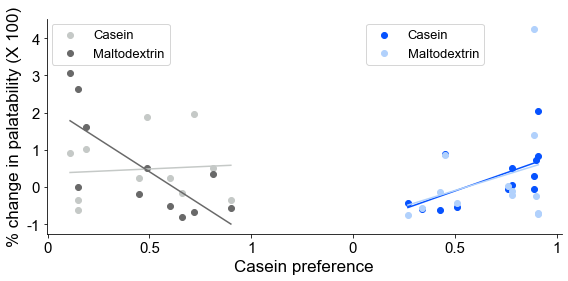

In [11]:
fig1a=plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 1, 1)

NR_cas_pref = [0.66+1, 0.49+1,  0.15+1, 0.45+1,  0.15+1, 0.11+1, 0.72+1, 0.81+1, 0.19+1, 0.60+1, 0.90+1]
NR_change_cas = [-17.06, 188.55, -35.85, 24.07, -61.15, 91.30, 195.29, 50.12, 102.55, 25.35, -35.99]
NR_change_mal = [-80.84, 51.93,  0.94, -17.92,  261.96, 305.74, -65.92, 34.87, 160.70, -50.00, -55.71 ]
PR_cas_pref = [0.76+2.5, 0.78+2.5, 0.91+2.5, 0.89+2.5, 0.78+2.5, 0.34+2.5, 0.27+2.5, 0.89+2.5, 0.90+2.5, 0.91+2.5, 0.43+2.5, 0.51+2.5, 0.45+2.5]
PR_change_cas = [-5.95, 52.16, 204.66, -5.57, 5.16, -59.68, -42.39, 28.62, 73.40, 82.46, -60.60, -53.36, 87.90]
PR_change_mal = [3.12, -12.05, -70.04, 139.25, -21.89, -56.15, -74.79, 425.71, -24.32, -73.44, -12.82, -42.11, 86.18]

p1 = ax.scatter(NR_cas_pref, NR_change_cas, c= "xkcd:silver")
p2 = ax.scatter(NR_cas_pref, NR_change_mal, c="dimgray")
p3 = ax.scatter(PR_cas_pref, PR_change_cas, c='xkcd:electric blue')
p4 = ax.scatter(PR_cas_pref, PR_change_mal, c='xkcd:powder blue')

ax.set_ylabel("% change in palatability (X 100)", fontsize=17)
ax.set_xlabel("Casein preference", fontsize=17)
plt.xticks([1, 1.5, 2, 2.5, 3, 3.5], ["0", "0.5",  "1",  "0", "0.5", "1"], fontsize=15)
plt.yticks([-100, 0, 100, 200, 300, 400], ["-1", "0",  "1",  "2", "3", "4"], fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.tick_params(labelsize=15)

b, m = polyfit(NR_cas_pref, NR_change_cas, 1)
plt.plot(np.unique(NR_cas_pref), b + m * np.unique(NR_cas_pref), '-', color="xkcd:silver")

a, n = polyfit(NR_cas_pref, NR_change_mal, 1)
plt.plot(np.unique(NR_cas_pref), a + n * np.unique(NR_cas_pref), '-', color= "dimgray")

c, o = polyfit(PR_cas_pref, PR_change_cas, 1)
plt.plot(np.unique(PR_cas_pref), c + o * np.unique(PR_cas_pref), '-', color= "xkcd:electric blue")

d, p = polyfit(PR_cas_pref, PR_change_mal, 1)
plt.plot(np.unique(PR_cas_pref), d + p * np.unique(PR_cas_pref), '-', color= "xkcd:powder blue")

leg1 = ax.legend([p1, p2],['Casein', 'Maltodextrin'], loc=(0.01, 0.785), fontsize=13, frameon=True)
leg2 = ax.legend([p3, p4], ['Casein', 'Maltodextrin'], loc=(0.62, 0.785), fontsize=13, frameon=True)
ax.add_artist(leg1)

plt.tight_layout()
plt.savefig('correl_casPref_change_without outliers.pdf', dpi=300)

# Cluster size: first 3 and last 3 clusters - Test 1 - PR rats

C:\Users\gc214\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
C:\Users\gc214\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


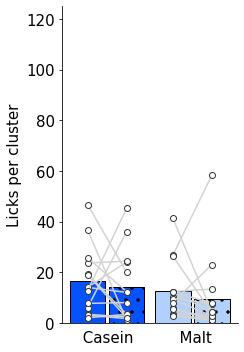

In [21]:
av_PR_C_first = [16.69]
av_PR_C_last = [13.98]
av_PR_M_first = [12.76]
av_PR_M_last = [9.57]

PR_C_first = [3.33, 14.00, 46.67, 23.67, 14.00, 25.67, 19.33, 3.00, 12.67, 6.00, 7.67, 36.67, 2.00, 19.00]
PR_C_last = [2.33, 24.00, 20.00, 24.33, 12.00, 12.33, 3.33, 1.67, 45.33, 36.00, 8.00, 1.00, 3.33, 2.00]
PR_M_first = [3.33, 10.00, 41.33, 6.00, 26.67, 12.33, 26.33, 3.00, 12.33, 5.33, 2.67, 9.33, 12.00, 8.00]
PR_M_last = [3.33, 7.33, 4.33, 1.00, 58.33, 7.67, 4.00, 1.67, 13.33, 2.00, 1.00, 2.67, 4.33, 23.00]

fig, ax = plt.subplots(figsize=(3.5, 5))
width = 0.5    
xvals = [0.5, 1.05, 1.70, 2.25]
fig.set_size_inches((3.5, 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_ylabel('Licks per cluster', fontsize=15)

ax.set_xticks([0.75, 1.95])

ax.set_xticklabels((' Casein', '  Malt'), fontsize=15)

bar1 = ax.bar(xvals[0], av_PR_C_first, width, color='xkcd:electric blue',  
            align='center', label='first 3', edgecolor='black', alpha=1, zorder=-1)
bar2 = ax.bar(xvals[1], av_PR_C_last, width, color='xkcd:electric blue',
           align='center', label='last 3', edgecolor='black', alpha=1, zorder=-1, hatch=".")
bar3 = ax.bar(xvals[2], av_PR_M_first, width, color='xkcd:powder blue',
           align='center', label='first 3', edgecolor='black', alpha=1, zorder=-1)
bar4 = ax.bar(xvals[3], av_PR_M_last, width, color='xkcd:powder blue',
           align='center', label='last 3', edgecolor='black', alpha=1, zorder=-1, hatch=".")

ax.set_ylim([0, 125])
ax.set_yticks([0, 20, 40, 60, 80, 100, 120])

plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 
       

for y1,y2 in zip(PR_C_first, PR_C_last):
    ax.plot([xvals[0], xvals[1]],[y1,y2], c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)
    
for y1,y2 in zip(PR_M_first, PR_M_last):
    ax.plot([xvals[2], xvals[3]],[y1,y2],c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)

#leg1 = ax.legend([bar1,bar2, bar3, bar4],['Cas.','Malto.', 'Cas.','Malto.'],  fontsize=9)
#leg1 = ax.legend([bar1,bar2],['First 3','Last 3'], loc='upper left', fontsize=6)
#leg2 = ax.legend([bar3,bar4],['First 3','last 3'], loc='upper right', fontsize=6)
#ax.add_artist(leg1)

#plt.title('Non-restricted', fontsize=15)
plt.tight_layout()
plt.savefig('First-last 3 clusters_PR.pdf', dpi=300)
plt.show()

# N of clusters - Test 1

/Users/giuliachiacchierini/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/Users/giuliachiacchierini/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


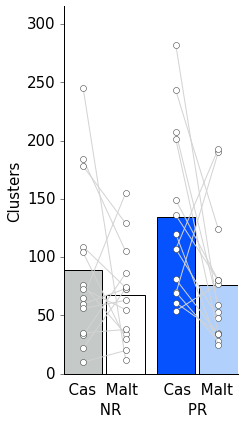

In [158]:
NR_cas = [184, 178, 76, 65, 60, 245, 22, 33, 73, 109, 56, 35, 104, 10]
NR_mal = [105, 129, 34, 155, 73, 12, 73, 86, 55, 74, 63, 38, 30, 20]
PR_cas = [81, 282, 70, 61, 120, 107, 54, 69, 207, 149, 201, 107, 136, 243]
PR_mal = [34, 53, 28, 35, 25, 48, 77, 190, 59, 80, 34, 193, 80, 124]

NR_cas_av = (89.29)
NR_mal_av = (67.64)
PR_cas_av = (134.79)
PR_mal_av = (75.71)

width = 0.5    
xvals = [0.5, 1.05, 1.70, 2.25]

fig, ax = plt.subplots(figsize=(3.5, 5))

fig.set_size_inches((3.5, 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_ylabel('Clusters', fontsize=15)
ax.set_xticks([0.7, 1.8])
ax.set_xticklabels(('  Cas  Malt', '      Cas  Malt'), fontsize=10)
plt.xlabel(' NR              PR', fontsize=15)


bar1 = ax.bar(xvals[0], NR_cas_av, width, color='xkcd:silver',  
            align='center', label='casein', edgecolor='black', alpha=1, zorder=-1)
bar2 = ax.bar(xvals[1], NR_mal_av, width, color='white',
           align='center', label='malto', edgecolor='black', alpha=1, zorder=-1)
bar3 = ax.bar(xvals[2], PR_cas_av, width, color='xkcd:electric blue',
           align='center', label='casein', edgecolor='black', alpha=1, zorder=-1)
bar4 = ax.bar(xvals[3], PR_mal_av, width, color='xkcd:powder blue',
           align='center', label='malto', edgecolor='black', alpha=1, zorder=-1)

plt.yticks([0, 50, 100, 150, 200, 250, 300], ['0', '50', '100', '150', '200', '250', '300'], fontsize=15)
plt.tick_params(labelsize=15)

for y1,y2 in zip(NR_cas, NR_mal):
    ax.plot([xvals[0], xvals[1]],[y1,y2], c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)
    
for y1,y2 in zip(PR_cas, PR_mal):
    ax.plot([xvals[2], xvals[3]],[y1,y2],c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)

    plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 

ax.set_ylim([0, 315])

ax.yaxis.tick_left()
ax.tick_params(direction="out")

#plt.title('Test 1', fontsize=15)
plt.tight_layout()
#plt.savefig('test 1_clusters.pdf', dpi=300)
plt.show()

# Licks per cluster - Test 1 - without outliers

/Users/giuliachiacchierini/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/Users/giuliachiacchierini/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


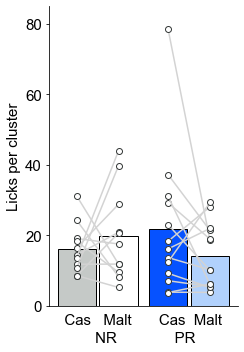

In [6]:
NR_cas = [19.11, 14.46, 8.55, 11.8, 16.41, 13.64, 18.27, 24.31, 10.64, 8.6, 31.25]
NR_mal = [17.55, 20.86, 20.63, 11.84,  28.81, 44, 9.53, 8.27, 39.73, 5.21, 11.87]
PR_cas = [7.12, 18.33, 78.61,  37.27, 29.26, 16.15, 3.87, 23.07, 31.13, 9.22, 13.7, 3.77, 12.41]
PR_mal = [5.47, 28.08, 18.57,  21.4, 18.94, 21.96, 3.8, 10.07, 6.11, 5.21, 10.21, 6.2, 29.33]

NR_cas_av = sum(NR_cas)/float(len(NR_cas))
NR_mal_av = sum(NR_mal)/float(len(NR_mal))
PR_cas_av = sum(PR_cas)/float(len(PR_cas))
PR_mal_av = sum(PR_mal)/float(len(PR_mal))

sc0 = (0, 0, 0, 0)
sc36 = (0.36, 0.36, 0.36, 0.36)
sc1 = (0.78, 0.78, 0.78, 0.78)
sc136 = (1.13, 1.13, 1.13, 1.13)



width = 0.5    
xvals = [0.5, 1.05, 1.70, 2.25]

fig, ax = plt.subplots(figsize=(3, 4))

fig.set_size_inches((3.5, 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_ylabel('Licks per cluster', fontsize=15)
ax.set_xticks([0.7, 1.8])
ax.set_xticklabels(('   Cas   Malt', '       Cas  Malt'), fontsize=10)
plt.xlabel(' NR              PR', fontsize=15)
ax.set_ylim(0, 80)

bar1 = ax.bar(xvals[0], NR_cas_av, width, color='xkcd:silver',  
            align='center', label='casein', edgecolor='black', alpha=1, zorder=-1)
bar2 = ax.bar(xvals[1], NR_mal_av, width, color='white',
           align='center', label='malto', edgecolor='black', alpha=1, zorder=-1)
bar3 = ax.bar(xvals[2], PR_cas_av, width, color='xkcd:electric blue',
           align='center', label='casein', edgecolor='black', alpha=1, zorder=-1)
bar4 = ax.bar(xvals[3], PR_mal_av, width, color='xkcd:powder blue',
           align='center', label='malto', edgecolor='black', alpha=1, zorder=-1)

plt.yticks([0, 20, 40, 60, 80], ["0", "20", "40", "60", "80"], fontsize=15)
plt.tick_params(labelsize=15)

for y1,y2 in zip(NR_cas, NR_mal):
    ax.plot([xvals[0], xvals[1]],[y1,y2], c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)
    
for y1,y2 in zip(PR_cas, PR_mal):
    ax.plot([xvals[2], xvals[3]],[y1,y2],c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)

    plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 

ax.set_ylim([0, 85])

#plt.title('Test 1', fontsize=15)
plt.tight_layout()
plt.savefig('IPP2-3_licks_x_clusters_test1_without outliers.pdf', dpi=300)
plt.show()

# N of clusters - 5 days 

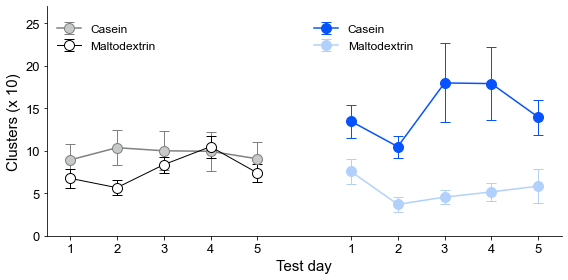

In [81]:
av_NR_cas = [89.29, 103.71, 100.07, 99.43, 90.64]
av_NR_mal = [67.64, 56.64, 83.71, 104.93, 74]
av_PR_cas = [134.79, 104.93, 179.92, 179.14, 139.71]
av_PR_mal = [75.71, 37, 45.54, 51.64, 58.50]

sem_NR_cas = [18.40, 20.29, 22.98, 23.26, 19.30]
sem_NR_mal = [11.04, 8.80, 9.57, 13.11, 10.85]
sem_PR_cas = [19.38, 13.08, 46.53, 43.12, 20.59]
sem_PR_mal = [14.96, 8.80, 8.22, 10.19, 20.20]

fig1a=plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 1, 1)

x1 = (0, 1, 2, 3, 4)
x2 = (6, 7, 8, 9, 10)

p1=plt.errorbar(x1, av_NR_cas, yerr=sem_NR_cas, color='grey', marker='o', markerfacecolor='xkcd:silver', markersize=10, elinewidth=1, capsize=5)
p2=plt.errorbar(x1, av_NR_mal, yerr=sem_NR_mal, color='black',  marker='o',  markerfacecolor='white', markersize=10, elinewidth=1, capsize=5, linewidth=1)
p3=plt.errorbar(x2, av_PR_cas, yerr=sem_PR_cas, color='xkcd:electric blue',  marker='o',  markerfacecolor='xkcd:electric blue', markersize=10, elinewidth=1, capsize=5)
p4=plt.errorbar(x2, av_PR_mal, yerr=sem_PR_mal, color='xkcd:powder blue',  marker='o',  markerfacecolor='xkcd:powder blue', markersize=10, elinewidth=1, capsize=5)

ax.set_ylabel("Clusters (x 10)", fontsize=15, fontname = "Arial")
ax.set_xlabel("Test day", fontsize=15, fontname = "Arial")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.tick_params(labelsize=13)
leg1 = ax.legend([p1, p2],['Casein', 'Maltodextrin'], loc=(0.01, 0.785), fontsize=12, frameon=False)
leg2 = ax.legend([p3, p4], ['Casein', 'Maltodextrin'], loc=(0.51, 0.785), fontsize=12, frameon=False)
ax.add_artist(leg1)

ax.set_xticks([0, 1, 2, 3, 4, 6, 7, 8, 9, 10])
ax.set_xticklabels(('1', '2', '3', '4', '5', '1', '2', '3', '4', '5'), fontsize=13, fontname = "Arial")
ax.set_yticks([0, 50, 100, 150, 200, 250])
ax.set_yticklabels(("0", "5", "10", "15", "20", "25"), fontsize=13, fontname = "Arial")
ax.set_ylim(0, 270)

plt.tight_layout()
plt.savefig('clusters_5 tests.pdf', dpi=300)
plt.show()

# Licks per clusters - 5 days 

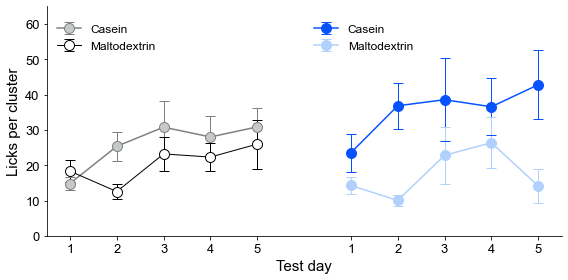

In [83]:
av_NR_cas = [14.81, 25.37, 30.78, 28.01, 30.86]
av_NR_mal = [18.32, 12.54, 23.20, 22.31, 25.99]
av_PR_cas = [23.53, 36.84, 38.56, 36.56, 42.80]
av_PR_mal = [14.26, 10.03, 22.81, 26.38, 14.13]

sem_NR_cas = [1.81, 4.05, 7.29, 5.82, 5.39]
sem_NR_mal = [3.12, 2.21, 4.79, 4.07, 6.93]
sem_PR_cas = [5.42, 6.49, 11.77, 8.13, 9.78]
sem_PR_mal = [2.35, 1.48, 8.12, 7.22, 4.76]

fig1a=plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 1, 1)

x1 = (0, 1, 2, 3, 4)
x2 = (6, 7, 8, 9, 10)

p1=plt.errorbar(x1, av_NR_cas, yerr=sem_NR_cas, color='grey',  marker='o', markerfacecolor='xkcd:silver', markersize=10, elinewidth=1, markeredgewidth=1, capsize=5)
p2=plt.errorbar(x1, av_NR_mal, yerr=sem_NR_mal, color='black',  marker='o',  markerfacecolor='white', markersize=10, elinewidth=1, capsize=5, linewidth=1)
p3=plt.errorbar(x2, av_PR_cas, yerr=sem_PR_cas, color='xkcd:electric blue',  marker='o',  markerfacecolor='xkcd:electric blue', markersize=10, elinewidth=1, capsize=5)
p4=plt.errorbar(x2, av_PR_mal, yerr=sem_PR_mal, color='xkcd:powder blue',  marker='o',  markerfacecolor='xkcd:powder blue', markersize=10, elinewidth=1, capsize=5)

ax.set_ylabel("Licks per cluster", fontsize=15, fontname = "Arial")
ax.set_xlabel("Test day", fontsize=15, fontname = "Arial")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.tick_params(labelsize=13)
leg1 = ax.legend([p1, p2],['Casein', 'Maltodextrin'], loc=(0.01, 0.785), fontsize=12,  frameon=False)
leg2 = ax.legend([p3, p4], ['Casein', 'Maltodextrin'], loc=(0.51, 0.785), fontsize=12, frameon=False)
ax.add_artist(leg1)

ax.set_xticks([0, 1, 2, 3, 4, 6, 7, 8, 9, 10])
ax.set_xticklabels(('1', '2', '3', '4', '5', '1', '2', '3', '4', '5'), fontsize=13, fontname = "Arial")
ax.set_yticks([0, 10, 20, 30, 40, 50, 60])
ax.set_ylim(0, 65)

plt.tight_layout()
plt.savefig('Licks per cluster_5 tests.pdf', dpi=300)
plt.show()

# IPP neo - Licks Test 1

/Users/giuliachiacchierini/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:132: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/Users/giuliachiacchierini/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:135: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


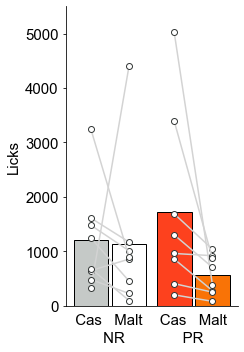

In [27]:
metafile= '/Users/giuliachiacchierini/Desktop/IPP paper/IPPneo_metafile.txt'
medfolder= '/Users/giuliachiacchierini/Desktop/IPP paper/MED-PC datafile_IPPneo/'


def DataExtract (metafile):
    f = open(metafile, 'r')
    f.seek(0)
    Rows = f.readlines()[1:]
    
    tablerows = []
    for i in Rows:
        tablerows.append(i.split('\t'))
        
        Medfile, Rat, Session, Diet, bottleL, bottleR, licksL, licksR, \
        TotalLicks, IntakeL, IntakeR = [], [], [], [], [], [], [], [], [], [], []
        
    for i, list in enumerate(tablerows):
        Medfile = Medfile + [list[0]]
        Rat = Rat + [list[1]]
        Session = Session + [list[2]]
        Diet = Diet + [list[3]]
        bottleL = bottleL + [list[4]]
        bottleR = bottleR + [list[5]]
        licksL = licksL + [list[6]]
        licksR = licksR + [list[7]]
        TotalLicks = TotalLicks + [list[8]]
        IntakeL = IntakeL + [list[9]]
        IntakeR = IntakeR + [list[10]]
            
    return ({'Medfile':Medfile, 'Rat':Rat, 'Session':Session, \
             'Diet':Diet, 'bottleL':bottleL, 'bottleR':bottleR, 'licksL':licksL, \
             'licksR':licksR, 'TotalLicks':TotalLicks, 'IntakeL':IntakeL, \
             'IntakeR':IntakeR})
    
Data = DataExtract(metafile)

Licks = []
for Medfile in Data['Medfile']:
    Licks.append(medfilereader(medfolder+Medfile,varsToExtract = ['b','e'], remove_var_header = True))

#when it's conditioning, you just have the list TotalLicks
LLicks = []
for l in Licks:
    LLicks.append(len(l[0]))
RLicks = []
for l in Licks:
    RLicks.append(len(l[1]))

#lists of licks 
    
test1_C_NR = []
test1_M_NR = []
test1_C_PR = []
test1_M_PR = []


for rat in np.unique(Data['Rat']): #create a list of the rats in numerical order
    for index, session in enumerate(Data['Session']): #index the position in the Session list
        if session == 's4' :
            if Data['Rat'][index] == rat:
                if 'NR' in Data['Diet'][index]:
                    if 'cas' in Data ['bottleL'][index]:
                        test1_C_NR.append(LLicks[index])
                    if 'cas' in Data ['bottleR'][index]:
                        test1_C_NR.append(RLicks[index])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_NR.append(LLicks[index])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_NR.append(RLicks[index])
                if 'PR' in Data['Diet'][index]:
                    if 'cas' in Data['bottleL'][index]:
                        test1_C_PR.append(LLicks[index])
                    if 'cas' in Data['bottleR'][index]:
                        test1_C_PR.append(RLicks[index])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_PR.append(LLicks[index])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_PR.append(RLicks[index])
                        

av_test1_C_NR = np.mean(test1_C_NR)
av_test1_M_NR = np.mean(test1_M_NR)
av_test1_C_PR = np.mean(test1_C_PR)
av_test1_M_PR = np.mean(test1_M_PR)



sc0 = (0, 0, 0, 0)
sc36 = (0.36, 0.36, 0.36, 0.36)
sc1 = (0.78, 0.78, 0.78, 0.78)
sc136 = (1.13, 1.13, 1.13, 1.13)



width = 0.5    
xvals = [0.5, 1.05, 1.70, 2.25]

fig, ax = plt.subplots(figsize=(3, 4))

fig.set_size_inches((3.5, 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_ylabel('Licks', fontsize=15)
ax.set_xticks([0.7, 1.8])
ax.set_xticklabels(('  Cas   Malt', '      Cas   Malt'), fontsize=10)
plt.xlabel(' NR              PR', fontsize=15)

bar1 = ax.bar(xvals[0], av_test1_C_NR, width, color='xkcd:silver',  
            align='center', label='casein', edgecolor='black', alpha=1, zorder=-1)
bar2 = ax.bar(xvals[1], av_test1_M_NR, width, color='white',
           align='center', label='malto', edgecolor='black', alpha=1, zorder=-1)
bar3 = ax.bar(xvals[2], av_test1_C_PR, width, color='xkcd:orange red',
           align='center', label='casein', edgecolor='black', alpha=1, zorder=-1)
bar4 = ax.bar(xvals[3], av_test1_M_PR, width, color='xkcd:orange',
           align='center', label='malto', edgecolor='black', alpha=1, zorder=-1)

ax.set_ylim([0, 5500])
ax.set_yticks([0, 1000, 2000, 3000, 4000, 5000])

plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 
       

for y1,y2 in zip(test1_C_NR, test1_M_NR):
    ax.plot([xvals[0], xvals[1]],[y1,y2], c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)
    
for y1,y2 in zip(test1_C_PR, test1_M_PR):
    ax.plot([xvals[2], xvals[3]],[y1,y2],c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)

#leg1 = ax.legend([bar1,bar2, bar3, bar4],['Cas.','Malto.', 'Cas.','Malto.'], loc=(0.02, 0.55),  fontsize=9)
#   leg1 = ax.legend([bar1,bar2],['Casein','Maltodextrin'], loc='upper left', fontsize=6)
  #leg2 = ax.legend([bar3,bar4],['Casein','Maltodextrin'], loc='upper right', fontsize=6)
  #ax.add_artist(leg1)

#plt.title('Test 1', fontsize=15)
plt.tight_layout()
plt.savefig('IPPneo_test1_licks.pdf', dpi=800)
plt.show()

#IPP neo - casein preference - Test 1

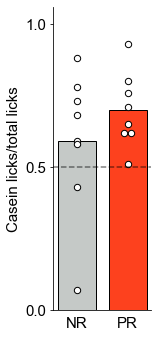

In [50]:
N=1
mNR = (0.59)
mPR = (0.70)
sNR = (0.59, 0.73, 0.88, 0.58, 0.68, 0.78, 0.43, 0.07)
sPR = (0.65, 0.80, 0.71, 0.93, 0.76, 0.62, 0.51, 0.62)

sc0 = (0, 0, 0, 0, 0,  0, 0, 0)
sc36 = (0.04, 0.04, 0.04, 0.04,  0.04, 0.043, 0.04, 0.037)

ind = np.arange(N)   
width = 0.03   

fig, ax = plt.subplots(figsize=(2.3, 4.8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_ylabel('Casein licks/total licks', fontsize=15)

ax.set_xticks([ind, ind+width+0.01])
ax.set_xticklabels(('NR', 'PR'), fontsize=15)

bar1 = ax.bar(ind, mNR,  width, color= 'xkcd:silver',
             align='center', label='NR', edgecolor='black', alpha=1, zorder=-1)

bar2 = ax.bar(ind+width+0.01, mPR, width, color='xkcd:orange red', 
            align='center', label='PR', edgecolor='black', alpha=1, zorder=-1)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False)        # ticks along the top edge are off
 
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(('0.0', '0.5', '1.0'), fontsize=15)
ax.set_ylim([0, 1.06])
plt.tick_params(labelsize=15)
plt.axhline(0.5, color='black', alpha=0.5, linestyle='dashed')
ax.scatter(sc0, sNR, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)
ax.scatter(sc36, sPR, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)  
#plt.title('Casein preference', fontsize=15)

plt.tight_layout()
plt.savefig('CasPref_Test1_IPPneo.pdf', format='pdf', dpi=800)
plt.show()

In [ ]:
# IPP neo - cumulative licks - Test 1

In [94]:
metafile= '/Users/giuliachiacchierini/Desktop/IPP paper/IPPneo_metafile.txt'
medfolder= '/Users/giuliachiacchierini/Desktop/IPP paper/MED-PC datafile_IPPneo/'

def DataExtract (metafile):
    f = open(metafile, 'r')
    f.seek(0)
    Rows = f.readlines()[1:]
    
    tablerows = []
    for i in Rows:
        tablerows.append(i.split('\t'))
        
        Medfile, Rat, Session, Diet, bottleL, bottleR, licksL, licksR, \
        TotalLicks, IntakeL, IntakeR = [], [], [], [], [], [], [], [], [], [], []
        
    for i, list in enumerate(tablerows):
        Medfile = Medfile + [list[0]]
        Rat = Rat + [list[1]]
        Session = Session + [list[2]]
        Diet = Diet + [list[3]]
        bottleL = bottleL + [list[4]]
        bottleR = bottleR + [list[5]]
        licksL = licksL + [list[6]]
        licksR = licksR + [list[7]]
        TotalLicks = TotalLicks + [list[8]]
        IntakeL = IntakeL + [list[9]]
        IntakeR = IntakeR + [list[10]]
            
    return ({'Medfile':Medfile, 'Rat':Rat, 'Session':Session, \
             'Diet':Diet, 'bottleL':bottleL, 'bottleR':bottleR, 'licksL':licksL, \
             'licksR':licksR, 'TotalLicks':TotalLicks, 'IntakeL':IntakeL, \
             'IntakeR':IntakeR})
    
Data = DataExtract(metafile)

Licks = []
for Medfile in Data['Medfile']:
    Licks.append(medfilereader(medfolder+Medfile,varsToExtract = ['b','e'], remove_var_header = True))

LLicks2 = []
for l in Licks:
    LLicks2.append(l[0])
RLicks2 = []
for l in Licks:
    RLicks2.append(l[1])

#lists of licks 
    
test1_C_NR = []
test1_M_NR = []
test1_C_PR = []
test1_M_PR = []

data  = pd.read_csv(metafile)


for rat in np.unique(Data['Rat']): #create a list of the rats in numerical order
    for index, session in enumerate(Data['Session']): #index the position in the Session list
        if session == 's4' :
            if Data['Rat'][index] == rat:
                if 'NR' in Data['Diet'][index]:
                    if 'cas' in Data ['bottleL'][index]:
                        test1_C_NR.append(LLicks2[index])
                    if 'cas' in Data ['bottleR'][index]:
                        test1_C_NR.append(RLicks2[index])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_NR.append(LLicks2[index])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_NR.append(RLicks2[index])
                if 'PR' in Data['Diet'][index]:
                    if 'cas' in Data['bottleL'][index]:
                        test1_C_PR.append(LLicks2[index])
                    if 'cas' in Data['bottleR'][index]:
                        test1_C_PR.append(RLicks2[index])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_PR.append(LLicks2[index])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_PR.append(RLicks2[index])

In [39]:
test1_C_NR_cumsum = []                     
for licklist in test1_C_NR:
    histTemp= np.histogram (licklist, bins=60, range=(0, 3600))[0]
    cumTemp = np.cumsum(histTemp)
    test1_C_NR_cumsum.append(cumTemp)

test1_M_NR_cumsum = []
for licklist in test1_M_NR:
    histTemp= np.histogram (licklist, bins=60, range=(0, 3600))[0]
    cumTemp = np.cumsum(histTemp)
    test1_M_NR_cumsum.append(cumTemp)
    
test1_C_PR_cumsum = []
for licklist in test1_C_PR:
    histTemp= np.histogram (licklist, bins=60, range=(0, 3600))[0]
    cumTemp = np.cumsum(histTemp)
    test1_C_PR_cumsum.append(cumTemp)
    
test1_M_PR_cumsum = []
for licklist in test1_M_PR:
    histTemp= np.histogram (licklist, bins=60, range=(0, 3600))[0]
    cumTemp = np.cumsum(histTemp)
    test1_M_PR_cumsum.append(cumTemp)
    
#df_test1_M_PR = pd.DataFrame(test1_M_PR)
#df_test1_C_PR = pd.DataFrame(test1_C_PR)
#df_test1_C_NR = pd.DataFrame(test1_C_NR)
#df_test1_M_NR = pd.DataFrame(test1_M_NR)
mean_test1_C_NR= np.mean(test1_C_NR_cumsum, axis=0)
mean_test1_M_NR = np.mean(test1_M_NR_cumsum, axis=0)
mean_test1_C_PR = np.mean(test1_C_PR_cumsum, axis=0)
mean_test1_M_PR = np.mean(test1_M_PR_cumsum, axis=0)
#mean_test1_M_NR = df_test1_M_NR.mean(axis=0)
#mean_test1_C_PR = df_test1_C_PR.mean(axis=0)
#mean_test1_M_PR = df_test1_M_PR.mean(axis=0)


nRats = len(test1_C_NR_cumsum)
sem_test1_C_NR= np.std(test1_C_NR_cumsum, axis=0)/np.sqrt(nRats)
sem_test1_M_NR = np.std(test1_M_NR_cumsum, axis=0)/np.sqrt(nRats)
sem_test1_C_PR = np.std(test1_C_PR_cumsum, axis=0)/np.sqrt(nRats)
sem_test1_M_PR = np.std(test1_M_PR_cumsum, axis=0)/np.sqrt(nRats)

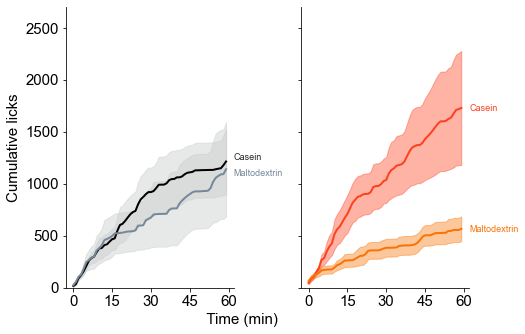

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(6, 5), sharex = True, sharey=True)
fig.subplots_adjust(top=0.85, bottom=0.2, left=0.15, right=0.95, wspace=0.4)

fig.set_size_inches((7, 6))

axs[0].spines["right"].set_visible(False)
axs[1].spines["right"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[1].spines["top"].set_visible(False)

linewidth=2
hist1=axs[0].plot(mean_test1_C_NR,  color="black", label='Casein', linewidth=linewidth)
hist2= axs[0].plot(mean_test1_M_NR,   color='lightslategray',  label='Maltodextrin', linewidth=linewidth)
hist3= axs[1].plot(mean_test1_C_PR,   color='xkcd:orange red',  label='Casein', linewidth=linewidth)
hist4= axs[1].plot(mean_test1_M_PR,   color='xkcd:orange',  label='Maltodextrin', linewidth=linewidth)

x=np.arange(60)
y=mean_test1_C_NR
yerror=sem_test1_C_NR
errorpatch = axs[0].fill_between(x, y-yerror, y+yerror, color='xkcd:silver', alpha=0.4)

y=mean_test1_M_NR
yerror=sem_test1_M_NR
errorpatch = axs[0].fill_between(x, y-yerror, y+yerror, color='xkcd:silver', alpha=0.4)

y=mean_test1_C_PR
yerror=sem_test1_C_PR
errorpatch = axs[1].fill_between(x, y-yerror, y+yerror, color='xkcd:orange red', alpha=0.4)

y=mean_test1_M_PR
yerror=sem_test1_M_PR
errorpatch = axs[1].fill_between(x, y-yerror, y+yerror, color='xkcd:orange', alpha=0.4)


axs[0].set_ylabel('Cumulative licks', fontsize=15)
axs[0].set_xlabel('                                             Time (min)', fontsize=15)
#axs[1].set_xlabel('Time (min)', fontsize=20)

plt.xticks([0, 15, 30, 45, 60], ["0", "15", "30", "45", "60"], fontsize=15)
#axs[0].set_xlim([0,12])
axs[0].set_ylim([0,2700])
plt.yticks([0, 500, 1000, 1500, 2000, 2500], fontsize=15)
#axs[1].tick_params(top='off', bottom='on', left='on', right='off', labelleft='off', labelbottom='on', labelsize=20)
axs[0].tick_params( labelsize=15)
axs[1].tick_params( labelsize=15)


axs[0].text(62, max(mean_test1_C_NR), 'Casein', va='bottom', color=almost_black, fontsize=9)
axs[0].text(62, max(mean_test1_M_NR), 'Maltodextrin', va='top', color='lightslategray', fontsize=9)
axs[1].text(62, max(mean_test1_C_PR), 'Casein', va='center', color='xkcd:orange red', fontsize=9)
axs[1].text(62, max(mean_test1_M_PR), 'Maltodextrin', va='center', color='xkcd:orange', fontsize=9)

fig.savefig('Timecourse_IPPneo_Test1.pdf', dpi=800, bbox_inches='tight')

# representative Weibull fit - 2.6 maltodextrin 

In [22]:
rep2_6 = [3, 9, 18, 43, 13, 9, 9, 12, 32, 10, 22, 25, 10, 38, 107, 122, 28, 24, 17, 88, 33, 9, 19, 25, 15, 1, 37, 48, 57, 26, 40, 23, 35, 2, 1, 12, 36, 80, 66, 24, 21, 58, 48, 29, 43, 17, 1, 2, 5, 14, 5, 6, 11]
rep2_6_a = [0.95, 0.82, 0.63, 0.27, 0.73, 0.82, 0.82, 0.75, 0.40, 0.79, 0.56, 0.50, 0.79, 0.33, 0.02, 0.01, 0.46, 0.52, 0.65, 0.05, 0.39, 0.82, 0.61, 0.50, 0.69, 0.99, 0.34, 0.23, 0.16, 0.49, 0.30, 0.54, 0.36, 0.97, 0.99, 0.75, 0.35, 0.07, 0.12, 0.52, 0.57, 0.16, 0.23, 0.44, 0.27, 0.65, 0.99, 0.97, 0.90, 0.71, 0.90, 0.88, 0.77]

fit2_6 = [3, 9, 18, 43, 13, 9, 9, 12, 32, 10, 22, 25, 10, 38, 107, 122, 28, 24, 17, 88, 33, 9, 19, 25, 15, 1, 37, 48, 57, 26, 40, 23, 35, 2, 1, 12, 36, 80, 66, 24, 21, 58, 48, 29, 43, 17, 1, 2, 5, 14, 5, 6, 11]
fit2_6_a = [0.90, 0.73, 0.53, 0.22, 0.63, 0.73, 0.73, 0.65, 0.32, 0.70, 0.46, 0.41, 0.70, 0.26, 0.02, 0.01, 0.37, 0.43, 0.55, 0.04, 0.31, 0.73, 0.51, 0.41, 0.59, 0.97, 0.27, 0.18, 0.13, 0.40, 0.24, 0.44, 0.29, 0.93, 0.97, 0.65, 0.28, 0.06, 0.10, 0.43, 0.48, 0.13, 0.18, 0.36, 0.22, 0.55, 0.97, 0.93, 0.84, 0.61, 0.84, 0.81, 0.68]

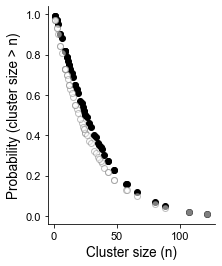

In [70]:
fig, axs = plt.subplots(1, 1, figsize=(2.5, 4))

axs.spines["right"].set_visible(False)
axs.spines["top"].set_visible(False)

axs.set_ylabel('Probability (cluster size > n)', fontsize=13.5, fontname = "Arial")
axs.set_xlabel('Cluster size (n)', fontsize=13.5, fontname = "Arial")
plt.tick_params(labelsize=11)

fig.set_size_inches((3, 4))

p1 = plt.scatter(rep2_6, rep2_6_a, c= "black")
p2 = plt.scatter(fit2_6, fit2_6_a, c= "white", edgecolors= "grey", alpha = 0.5)

fig.savefig('representative_2-6_weibull.pdf', dpi=800, bbox_inches='tight')

# Weibull 

In [47]:
# NR casein
s2_1_cas = [7, 28, 14, 11, 3, 1, 12, 37, 24, 24, 17, 7, 6, 19, 1, 39, 1, 25, 49, 12, 9, 3, 43, 1, 2, 11, 3, 47, 18, 2, 5, 60, 63, 31, 8, 11, 19, 14, 1, 8, 68, 8, 21, 8, 5, 100, 6, 83, 45, 48, 23, 23, 19, 12, 13, 7, 44, 24, 27, 19, 32, 66, 4, 18, 1, 36, 6, 27, 24, 39, 2, 3, 40, 5, 1, 1, 3, 7, 8, 37, 14, 13, 25, 1, 16, 27, 24, 19, 61, 8, 1, 13, 7, 36, 36, 1, 19, 14, 37, 23, 12, 37, 6, 16, 8, 36, 25, 16, 4, 21, 9, 27, 1, 3, 2, 9, 55, 44, 20, 33, 60, 35, 1, 17, 1, 9, 2, 13, 39, 6, 9, 87, 26, 39, 3, 2, 5, 3, 7, 1, 12, 25, 25, 6, 19, 19, 16, 15, 3, 21, 13, 35, 27, 6, 17, 21, 3, 26, 1, 6, 4, 45, 18, 18, 22, 67, 83, 21, 1, 37, 20, 28, 39, 49, 2, 4, 20, 13, 8, 27, 7, 29, 2, 3]
s2_1_a_cas = [0.71, 0.23, 0.52, 0.61, 0.87, 0.96, 0.58, 0.15, 0.29, 0.29, 0.44, 0.71, 0.75, 0.39, 0.96, 0.13, 0.96, 0.28, 0.07, 0.58, 0.64, 0.87, 0.10, 0.96, 0.92, 0.61, 0.87, 0.08, 0.41, 0.92, 0.79, 0.04, 0.03, 0.21, 0.68, 0.61, 0.39, 0.52, 0.96, 0.68, 0.02, 0.68, 0.35, 0.68, 0.79, 0.00, 0.75, 0.01, 0.09, 0.07, 0.31, 0.31, 0.39, 0.58, 0.55, 0.71, 0.10, 0.29, 0.25, 0.39, 0.20, 0.03, 0.83, 0.41, 0.96, 0.15, 0.75, 0.25, 0.29, 0.13, 0.92, 0.87, 0.12, 0.79, 0.96, 0.96, 0.87, 0.71, 0.68, 0.15, 0.52, 0.55, 0.28, 0.96, 0.46, 0.25, 0.29, 0.39, 0.04, 0.68, 0.96, 0.55, 0.71, 0.15, 0.15, 0.96, 0.39, 0.52, 0.15, 0.31, 0.58, 0.15, 0.75, 0.46, 0.68, 0.15, 0.28, 0.46, 0.83, 0.35, 0.64, 0.25, 0.96, 0.87, 0.92, 0.64, 0.05, 0.10, 0.37, 0.18, 0.04, 0.16, 0.96, 0.44, 0.96, 0.64, 0.92, 0.55, 0.13, 0.75, 0.64, 0.01, 0.26, 0.13, 0.87, 0.92, 0.79, 0.87, 0.71, 0.96, 0.58, 0.28, 0.28, 0.75, 0.39, 0.39, 0.46, 0.49, 0.87, 0.35, 0.55, 0.16, 0.25, 0.75, 0.44, 0.35, 0.87, 0.26, 0.96, 0.75, 0.83, 0.09, 0.41, 0.41, 0.33, 0.02, 0.01, 0.35, 0.96, 0.15, 0.37, 0.23, 0.13, 0.07, 0.92, 0.83, 0.37, 0.55, 0.68, 0.25, 0.71, 0.22, 0.92, 0.87]

s2_2_cas = [2, 9, 10, 22, 10, 6, 10, 38, 17, 13, 7, 3, 9, 8, 8, 11, 14, 7, 6, 30, 15, 7, 14, 3, 8, 9, 2, 23, 8, 1, 10, 2, 14, 8, 8, 2, 6, 1, 5, 9, 7, 6, 1, 8, 2, 10, 7, 2, 14, 1, 1, 3, 6, 5, 9, 6, 6, 5, 16, 11, 8, 15, 2, 15, 13, 3, 18, 8, 9, 1, 9, 1, 15, 11, 42, 1, 23, 10, 33, 16, 14, 16, 8, 2, 20, 14, 17, 23, 5, 9, 10, 15, 6, 13, 3, 3, 16, 14, 9, 1, 28, 26, 24, 10, 9, 7, 18, 53, 30, 41, 27, 14, 34, 11, 42, 17, 19, 31, 8, 65, 66, 15, 5, 35, 68, 15, 25, 8, 31, 16, 14, 3, 20, 1, 53, 22, 15, 3, 26, 25, 1, 1, 43, 5, 22, 42, 47, 26, 24, 10, 41, 42, 100, 50, 77, 17, 13, 10, 20, 45, 64, 25, 33, 15, 8, 27, 23, 52, 9, 30, 10, 2, 9, 2, 1, 1, 2, 5]
s2_2_a_cas = [0.88, 0.56, 0.51, 0.22, 0.51, 0.70, 0.51, 0.06, 0.31, 0.43, 0.65, 0.82, 0.56, 0.60, 0.60, 0.47, 0.40, 0.65, 0.70, 0.12, 0.37, 0.65, 0.40, 0.82, 0.60, 0.56, 0.88, 0.20, 0.60, 0.94, 0.51, 0.88, 0.40, 0.60, 0.60, 0.88, 0.70, 0.94, 0.76, 0.56, 0.65, 0.70, 0.94, 0.60, 0.88, 0.51, 0.65, 0.88, 0.40, 0.94, 0.94, 0.82, 0.70, 0.76, 0.56, 0.70, 0.70, 0.76, 0.34, 0.47, 0.60, 0.37, 0.88, 0.37, 0.43, 0.82, 0.28, 0.60, 0.56, 0.94, 0.56, 0.94, 0.37, 0.47, 0.04, 0.94, 0.20, 0.51, 0.09, 0.34, 0.40, 0.34, 0.60, 0.88, 0.24, 0.40, 0.31, 0.20, 0.76, 0.56, 0.51, 0.37, 0.70, 0.43, 0.82, 0.82, 0.34, 0.40, 0.56, 0.94, 0.13, 0.15, 0.18, 0.51, 0.56, 0.65, 0.28, 0.02, 0.12, 0.05, 0.14, 0.40, 0.08, 0.47, 0.04, 0.31, 0.26, 0.11, 0.60, 0.01, 0.01, 0.37, 0.76, 0.07, 0.00, 0.37, 0.17, 0.60, 0.11, 0.34, 0.40, 0.82, 0.24, 0.94, 0.02, 0.22, 0.37, 0.82, 0.15, 0.17, 0.94, 0.94, 0.04, 0.76, 0.22, 0.04, 0.03, 0.15, 0.18, 0.51, 0.05, 0.04, 0.00, 0.02, 0.00, 0.31, 0.43, 0.51, 0.24, 0.03, 0.01, 0.17, 0.09, 0.37, 0.60, 0.14, 0.20, 0.02, 0.56, 0.12, 0.51, 0.88, 0.56, 0.88, 0.94, 0.94, 0.88, 0.76]

s2_4_cas = [13, 19, 11, 2, 8, 11, 16, 15, 18, 8, 55, 11, 50, 11, 53, 31, 5, 3, 3, 3, 5, 3, 2, 3, 2, 2, 3, 5, 8, 2, 2, 2, 2, 2, 3, 8, 10, 79, 8, 100, 42, 24, 15, 5, 11, 2, 8, 6, 8, 21, 15, 6, 8, 2, 3, 24, 5, 10, 8, 2, 5, 53, 11, 6, 2]
s2_4_a_cas = [0.19, 0.09, 0.23, 0.76, 0.33, 0.23, 0.13, 0.16, 0.11, 0.33, 0.00, 0.23, 0.00, 0.23, 0.00, 0.03, 0.49, 0.60, 0.60, 0.60, 0.49, 0.60, 0.76, 0.60, 0.76, 0.76, 0.60, 0.49, 0.33, 0.76, 0.76, 0.76, 0.76, 0.76, 0.60, 0.33, 0.27, 0.00, 0.33, 0.00, 0.01, 0.06, 0.16, 0.49, 0.23, 0.76, 0.33, 0.40, 0.33, 0.08, 0.16, 0.40, 0.33, 0.76, 0.60, 0.06, 0.49, 0.27, 0.33, 0.76, 0.49, 0.00, 0.23, 0.40, 0.76]

s2_11_cas = [9, 4, 7, 11, 7, 11, 9, 2, 9, 5, 13, 25, 18, 2, 4, 38, 44, 13, 5, 67, 27, 96, 35, 11, 2, 2, 2, 2, 2, 96, 4, 73, 18, 20, 56, 25, 5, 51, 2, 62, 13, 53, 38, 7, 24, 100, 2, 2, 20, 2, 38, 22, 11, 16, 2, 2, 11, 2, 2, 27]
s2_11_a_cas = [0.41, 0.65, 0.47, 0.36, 0.47, 0.36, 0.41, 0.78, 0.41, 0.55, 0.31, 0.13, 0.21, 0.78, 0.65, 0.06, 0.04, 0.31, 0.55, 0.01, 0.12, 0.00, 0.08, 0.36, 0.78, 0.78, 0.78, 0.78, 0.78, 0.00, 0.65, 0.01, 0.21, 0.19, 0.02, 0.13, 0.55, 0.03, 0.78, 0.02, 0.31, 0.03, 0.06, 0.47, 0.15, 0.00, 0.78, 0.78, 0.19, 0.78, 0.06, 0.17, 0.36, 0.24, 0.78, 0.78, 0.36, 0.78, 0.78, 0.12]

s2_15_cas = [2, 13, 16, 100, 84, 13, 27, 80, 29, 62, 36, 38, 25, 16, 13, 7, 13, 25, 31, 20, 2, 4]
s2_15_a_cas = [0.93, 0.46, 0.35, 0.00, 0.00, 0.46, 0.14, 0.00, 0.12, 0.01, 0.06, 0.05, 0.17, 0.35, 0.46, 0.68, 0.46, 0.17, 0.11, 0.26, 0.93, 0.84]

s2_16_cas = [3, 15, 8, 18, 18, 23, 13, 33, 10, 11, 2, 2, 18, 16, 21, 10, 16, 13, 54, 25, 100, 15, 26, 52, 48, 11, 49, 7, 41, 10, 15, 30, 5]
s2_16_a_cas = [0.88, 0.33, 0.62, 0.23, 0.23, 0.13, 0.39, 0.03, 0.53, 0.46, 0.95, 0.95, 0.23, 0.28, 0.15, 0.53, 0.28, 0.39, 0.00, 0.10, 0.00, 0.33, 0.08, 0.00, 0.00, 0.46, 0.00, 0.70, 0.01, 0.53, 0.33, 0.05, 0.79]

s3_1_cas = [2, 5, 2, 3, 1, 1, 26, 5, 1, 2, 1, 3, 4, 6, 9, 11, 17, 12, 10, 15, 10, 9, 21, 14, 30, 17, 24, 47, 58, 1, 38, 27, 31, 56, 13, 4, 19, 12, 5, 17, 13, 29, 18, 1, 15, 4, 11, 34, 21, 4, 100, 44, 20, 29, 68, 17, 53, 32, 17, 21, 19, 20, 27, 4, 14, 10, 2, 1, 6, 9, 14, 17, 16]
s3_1_a_cas = [0.92, 0.80, 0.92, 0.88, 0.96, 0.96, 0.23, 0.80, 0.96, 0.92, 0.96, 0.88, 0.84, 0.76, 0.65, 0.58, 0.39, 0.55, 0.62, 0.47, 0.62, 0.65, 0.31, 0.49, 0.18, 0.41, 0.26, 0.06, 0.03, 0.96, 0.11, 0.21, 0.17, 0.03, 0.52, 0.84, 0.35, 0.55, 0.80, 0.39, 0.52, 0.19, 0.37, 0.96, 0.47, 0.84, 0.58, 0.14, 0.31, 0.84, 0.00, 0.07, 0.33, 0.19, 0.01, 0.39, 0.04, 0.16, 0.41, 0.31, 0.35, 0.33, 0.21, 0.84, 0.49, 0.62, 0.92, 0.96, 0.76, 0.65, 0.49, 0.41, 0.44]

s3_2_cas = [4, 2, 13, 11, 9, 8, 4, 8, 1, 9, 10, 5, 9, 8, 12, 27, 11, 8, 11, 5, 22, 7, 6, 4, 5, 12, 11, 0, 87, 8, 14, 8, 24, 4, 1, 2, 21, 2, 9, 2, 5, 3, 0, 1, 0, 0, 0, 1, 4, 3, 1, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 15, 8, 15, 6, 6, 16, 5, 6, 6, 22, 26, 11, 6, 8, 15, 5, 10, 5, 13, 2, 21, 6, 10, 0, 23, 21, 26, 30, 14, 34, 29, 3, 1, 10, 27, 21, 12, 13, 19, 38, 6, 4, 20, 22, 1, 2, 100, 47]
s3_2_a_cas = [0.82, 0.92, 0.56, 0.60, 0.67, 0.70, 0.84, 0.70, 0.96, 0.67, 0.64, 0.79, 0.66, 0.70, 0.57, 0.30, 0.62, 0.70, 0.62, 0.79, 0.38, 0.71, 0.77, 0.84, 0.79, 0.57, 0.60, 0.98, 0.02, 0.68, 0.54, 0.68, 0.34, 0.82, 0.94, 0.90, 0.40, 0.92, 0.66, 0.92, 0.81, 0.88, 0.98, 0.96, 0.98, 0.98, 0.98, 0.96, 0.82, 0.88, 0.94, 0.98, 0.94, 0.98, 0.98, 0.98, 0.84, 0.98, 0.98, 0.98, 0.98, 0.50, 0.70, 0.51, 0.77, 0.74, 0.48, 0.81, 0.76, 0.76, 0.37, 0.32, 0.60, 0.76, 0.70, 0.50, 0.79, 0.63, 0.81, 0.56, 0.90, 0.40, 0.74, 0.63, 0.98, 0.36, 0.39, 0.32, 0.27, 0.54, 0.22, 0.28, 0.86, 0.94, 0.63, 0.30, 0.40, 0.58, 0.55, 0.43, 0.19, 0.74, 0.82, 0.40, 0.37, 0.96, 0.92, 0.01, 0.13]

s3_5_cas = [11, 11, 3, 20, 9, 33, 2, 9, 14, 3, 2, 2, 3, 11, 5, 20, 28, 17, 53, 16, 23, 2, 2, 2, 25, 41, 11, 2, 2, 2, 2, 5, 9, 3, 13, 9, 9, 25, 13, 27, 13, 13, 44, 39, 100, 34, 34, 52, 78, 8, 5, 3, 3, 2, 6, 3]
s3_5_a_cas = [0.33, 0.33, 0.70, 0.14, 0.38, 0.05, 0.83, 0.38, 0.25, 0.70, 0.83, 0.83, 0.70, 0.33, 0.60, 0.14, 0.07, 0.19, 0.01, 0.22, 0.11, 0.83, 0.83, 0.83, 0.10, 0.03, 0.33, 0.83, 0.83, 0.83, 0.83, 0.60, 0.38, 0.70, 0.29, 0.38, 0.38, 0.10, 0.29, 0.08, 0.29, 0.29, 0.02, 0.03, 0.00, 0.04, 0.04, 0.01, 0.00, 0.44, 0.60, 0.70, 0.70, 0.83, 0.51, 0.70]

s3_6_cas = [17, 7, 34, 38, 3, 31, 3, 17, 28, 31, 24, 28, 45, 24, 24, 48, 38, 24, 72, 90, 31, 24, 31, 21, 10, 28, 21, 34, 24, 24, 14, 100, 14, 17, 17]
s3_6_a_cas = [0.01, 0.60, 0.00, 0.00, 0.91, 0.00, 0.91, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00, 0.06, 0.00, 0.06, 0.01, 0.01]

s3_9_cas = [9, 20, 24, 40, 3, 1, 42, 41, 12, 35, 47, 26, 45, 20, 18, 44, 36, 16, 46, 52, 9, 4, 11, 4, 3, 26, 33, 45, 45, 12, 24, 20, 16, 54, 4, 2, 40, 8, 94, 15, 11, 28, 28, 11, 94, 18, 76, 6, 49, 41, 90, 2, 54, 12, 36, 45, 11, 42, 4, 24, 100, 76, 42, 29, 33, 20, 14, 12, 13, 16, 7, 36, 67, 11, 15, 13, 11, 10, 28, 14, 11, 24, 12, 33, 7, 7, 10, 2, 33, 12, 11, 7, 8, 6, 8, 8, 11, 14, 10, 15, 9, 53, 24, 11]
s3_9_a_cas = [0.81, 0.56, 0.49, 0.28, 0.94, 0.99, 0.26, 0.27, 0.73, 0.34, 0.21, 0.46, 0.23, 0.58, 0.61, 0.24, 0.33, 0.64, 0.23, 0.17, 0.81, 0.92, 0.75, 0.92, 0.94, 0.46, 0.36, 0.23, 0.23, 0.73, 0.49, 0.58, 0.64, 0.16, 0.92, 0.97, 0.28, 0.82, 0.03, 0.68, 0.75, 0.43, 0.44, 0.75, 0.03, 0.61, 0.07, 0.88, 0.20, 0.26, 0.03, 0.97, 0.16, 0.73, 0.33, 0.23, 0.77, 0.26, 0.92, 0.49, 0.02, 0.06, 0.26, 0.41, 0.37, 0.58, 0.70, 0.73, 0.71, 0.64, 0.84, 0.33, 0.09, 0.77, 0.66, 0.71, 0.75, 0.79, 0.44, 0.70, 0.75, 0.49, 0.73, 0.37, 0.86, 0.84, 0.79, 0.97, 0.37, 0.73, 0.75, 0.84, 0.82, 0.88, 0.82, 0.82, 0.77, 0.70, 0.79, 0.68, 0.81, 0.17, 0.49, 0.75]

In [59]:
# NR maltodextrin
s2_1 = [11, 12, 10, 30, 27, 36, 11, 9, 9, 10, 15, 5, 6, 8, 13, 9, 12, 19, 20, 16, 8, 15, 15, 20, 5, 5, 24, 2, 29, 23, 4, 9, 1, 100, 2, 54, 74, 31, 23, 17, 2, 2, 45, 59, 13, 4, 27, 18, 13, 1, 1, 77, 48, 12, 2, 1, 52, 70, 20, 14, 20, 13, 7, 8, 10, 25, 5, 5, 10, 2, 1, 1, 1, 2, 5, 1, 5, 5, 2, 15, 2, 1, 5, 1, 5, 1, 2, 5, 2, 1, 2, 5, 1, 2, 3, 4, 5, 1, 4, 1, 1, 3, 8, 3, 5]
s2_1_a = [0.46, 0.44, 0.48, 0.17, 0.19, 0.13, 0.46, 0.53, 0.53, 0.48, 0.37, 0.67, 0.61, 0.55, 0.40, 0.50, 0.44, 0.30, 0.28, 0.34, 0.55, 0.37, 0.37, 0.29, 0.67, 0.67, 0.23, 0.80, 0.18, 0.24, 0.71, 0.50, 0.91, 0.01, 0.85, 0.06, 0.03, 0.16, 0.24, 0.32, 0.80, 0.80, 0.09, 0.05, 0.42, 0.71, 0.19, 0.31, 0.42, 0.91, 0.91, 0.02, 0.08, 0.44, 0.85, 0.91, 0.06, 0.03, 0.28, 0.38, 0.29, 0.42, 0.58, 0.55, 0.48, 0.22, 0.64, 0.67, 0.48, 0.80, 0.91, 0.91, 0.91, 0.80, 0.67, 0.91, 0.67, 0.64, 0.85, 0.37, 0.85, 0.91, 0.64, 0.91, 0.67, 0.91, 0.85, 0.67, 0.85, 0.91, 0.80, 0.64, 0.91, 0.80, 0.75, 0.71, 0.64, 0.91, 0.71, 0.91, 0.91, 0.75, 0.55, 0.75, 0.67]

s2_2 = [4, 1, 6, 7, 5, 13, 7, 13, 2, 34, 32, 15, 12, 10, 8, 25, 7, 8, 18, 16, 16, 7, 8, 64, 14, 62, 11, 9, 1, 9, 6, 10, 6, 3, 16, 16, 22, 11, 16, 11, 6, 11, 32, 14, 37, 19, 22, 6, 7, 10, 10, 12, 17, 26, 14, 13, 4, 17, 19, 16, 40, 14, 25, 14, 32, 26, 4, 38, 15, 15, 18, 30, 17, 16, 5, 17, 13, 21, 32, 14, 8, 5, 53, 82, 32, 21, 7, 39, 23, 21, 31, 32, 32, 14, 29, 18, 41, 17, 11, 1, 11, 19, 17, 1, 1, 2, 1, 1, 2, 19, 36, 37, 19, 23, 12, 43, 95, 14, 100, 10, 19, 27, 25, 9, 9, 28, 13, 15, 21]
s2_2_a = [0.93, 0.99, 0.85, 0.82, 0.88, 0.64, 0.82, 0.64, 0.97, 0.15, 0.18, 0.55, 0.67, 0.73, 0.79, 0.29, 0.82, 0.79, 0.47, 0.52, 0.52, 0.82, 0.79, 0.01, 0.58, 0.01, 0.70, 0.76, 0.99, 0.76, 0.85, 0.73, 0.85, 0.95, 0.52, 0.52, 0.37, 0.70, 0.52, 0.70, 0.85, 0.70, 0.18, 0.58, 0.12, 0.45, 0.37, 0.85, 0.82, 0.73, 0.73, 0.67, 0.50, 0.27, 0.61, 0.64, 0.93, 0.50, 0.45, 0.52, 0.09, 0.61, 0.29, 0.58, 0.18, 0.27, 0.93, 0.11, 0.55, 0.55, 0.47, 0.21, 0.50, 0.52, 0.88, 0.50, 0.64, 0.40, 0.17, 0.58, 0.79, 0.88, 0.03, 0.00, 0.17, 0.40, 0.82, 0.10, 0.35, 0.40, 0.19, 0.18, 0.17, 0.58, 0.22, 0.47, 0.08, 0.50, 0.70, 0.99, 0.70, 0.45, 0.50, 0.99, 0.99, 0.97, 0.99, 0.99, 0.97, 0.45, 0.13, 0.12, 0.45, 0.33, 0.67, 0.07, 0.00, 0.58, 0.00, 0.73, 0.45, 0.26, 0.29, 0.76, 0.76, 0.24, 0.64, 0.55, 0.40]

s2_4 = [1, 7, 23, 17, 100, 16, 1, 44, 13, 10, 1, 27, 1, 24, 13, 37, 10, 9, 14, 1, 11, 1, 1, 10, 8, 39, 7, 23, 42, 18, 4, 1, 19, 23, 10, 19, 2, 1, 13, 7, 38, 7, 13, 10, 4, 22, 19, 14, 43, 44, 20, 13, 1, 1, 10, 2, 1, 1, 1, 37, 28, 5, 1, 13, 1, 4, 1, 9, 1, 1, 3, 1, 5, 1, 1, 1, 2, 10, 10, 43, 25, 25, 29, 44, 23, 22, 37, 32, 19, 6, 8, 20, 13, 14, 13, 3, 1, 1, 26, 32, 24, 1, 4, 1, 2, 1, 1, 1, 1, 3, 1, 2, 7, 1, 1, 74, 46, 25, 11, 16, 29, 40, 9, 2, 1, 3, 1, 1, 1, 66, 51, 57, 61, 42, 15, 19, 1, 54, 16, 15, 13, 1, 1, 10, 1, 1, 13, 60, 48, 1, 1, 2, 52, 1, 1]
s2_4_a = [0.93, 0.65, 0.31, 0.40, 0.02, 0.42, 0.93, 0.14, 0.47, 0.56, 0.93, 0.27, 0.88, 0.30, 0.47, 0.19, 0.54, 0.58, 0.45, 0.88, 0.52, 0.93, 0.93, 0.56, 0.60, 0.17, 0.65, 0.31, 0.15, 0.38, 0.73, 0.93, 0.37, 0.31, 0.54, 0.36, 0.83, 0.93, 0.47, 0.62, 0.18, 0.65, 0.47, 0.54, 0.76, 0.33, 0.37, 0.45, 0.15, 0.14, 0.35, 0.47, 0.93, 0.93, 0.54, 0.83, 0.88, 0.93, 0.93, 0.18, 0.25, 0.70, 0.88, 0.48, 0.93, 0.73, 0.88, 0.58, 0.88, 0.93, 0.79, 0.93, 0.70, 0.88, 0.93, 0.88, 0.83, 0.54, 0.54, 0.15, 0.29, 0.28, 0.25, 0.14, 0.31, 0.33, 0.18, 0.22, 0.36, 0.67, 0.60, 0.35, 0.48, 0.45, 0.48, 0.79, 0.88, 0.88, 0.28, 0.22, 0.30, 0.88, 0.73, 0.93, 0.83, 0.93, 0.93, 0.93, 0.93, 0.79, 0.93, 0.83, 0.65, 0.88, 0.93, 0.05, 0.13, 0.28, 0.52, 0.41, 0.25, 0.16, 0.58, 0.83, 0.88, 0.79, 0.93, 0.93, 0.88, 0.07, 0.11, 0.09, 0.08, 0.15, 0.44, 0.37, 0.93, 0.10, 0.42, 0.44, 0.47, 0.88, 0.93, 0.56, 0.93, 0.93, 0.48, 0.08, 0.12, 0.88, 0.88, 0.83, 0.11, 0.88, 0.93]

s2_11 = [3, 12, 6, 16, 38, 54, 29, 40, 34, 44, 21, 3, 1, 28, 13, 1, 12, 1, 46, 22, 4, 1, 38, 1, 7, 22, 49, 3, 6, 18, 6, 22, 97, 18, 18, 4, 10, 3, 22, 18, 1, 4, 9, 3, 21, 1, 9, 29, 9, 12, 51, 6, 4, 26, 6, 6, 7, 9, 10, 12, 13, 100, 4, 24, 26, 10, 16, 4, 21, 4, 6, 4, 7]
s2_11_a = [0.78, 0.36, 0.61, 0.24, 0.03, 0.01, 0.07, 0.03, 0.05, 0.02, 0.16, 0.78, 0.89, 0.08, 0.31, 0.89, 0.36, 0.89, 0.02, 0.14, 0.69, 0.89, 0.03, 0.89, 0.53, 0.14, 0.01, 0.78, 0.61, 0.21, 0.61, 0.14, 0.00, 0.21, 0.21, 0.69, 0.41, 0.78, 0.14, 0.21, 0.89, 0.69, 0.47, 0.78, 0.16, 0.89, 0.47, 0.07, 0.47, 0.36, 0.01, 0.61, 0.69, 0.09, 0.61, 0.61, 0.53, 0.47, 0.41, 0.36, 0.31, 0.00, 0.69, 0.12, 0.09, 0.41, 0.24, 0.69, 0.16, 0.69, 0.61, 0.69, 0.53]

s2_15 = [1, 1, 2, 2, 5, 5, 5, 7, 7, 9, 9, 1, 16, 14, 22, 6, 5, 1, 14, 7, 5, 1, 5, 11, 35, 10, 4, 9, 40, 20, 58, 9, 10, 11, 3, 13, 10, 1, 11, 11, 38, 33, 15, 47, 11, 34, 14, 3, 14, 100, 57, 37, 45, 22, 44, 18, 6, 21, 3, 6, 4, 10, 11, 3, 6, 3, 6, 2, 73, 78, 15, 1, 9]
s2_15_a = [0.96, 0.96, 0.91, 0.91, 0.78, 0.80, 0.78, 0.73, 0.71, 0.66, 0.68, 0.96, 0.51, 0.54, 0.41, 0.76, 0.80, 0.94, 0.56, 0.71, 0.78, 0.96, 0.80, 0.62, 0.26, 0.65, 0.82, 0.68, 0.22, 0.44, 0.12, 0.66, 0.63, 0.61, 0.86, 0.58, 0.63, 0.94, 0.62, 0.61, 0.24, 0.29, 0.53, 0.18, 0.62, 0.27, 0.54, 0.84, 0.56, 0.03, 0.13, 0.24, 0.19, 0.42, 0.20, 0.47, 0.76, 0.42, 0.86, 0.76, 0.82, 0.65, 0.61, 0.86, 0.74, 0.84, 0.74, 0.91, 0.08, 0.07, 0.53, 0.96, 0.68]

s2_16 = [2, 2, 1, 2, 4, 5, 12, 5, 3, 6, 11, 1, 9, 6, 0, 2, 4, 2, 2, 8, 12, 5, 19, 16, 12, 2, 1, 9, 3, 12, 8, 7, 9, 4, 0, 31, 19, 13, 8, 12, 2, 10, 10, 6, 2, 0, 5, 0, 13, 4, 46, 4, 31, 5, 22, 15, 17, 2, 80, 5, 23, 9, 40, 9, 25, 41, 19, 12, 3, 3, 5, 2, 15, 2, 1, 2, 82, 31, 14, 19, 2, 100, 41, 51, 28, 4]
s2_16_a = [0.92, 0.90, 0.94, 0.92, 0.87, 0.82, 0.67, 0.83, 0.88, 0.79, 0.70, 0.96, 0.74, 0.79, 0.98, 0.91, 0.85, 0.92, 0.92, 0.77, 0.67, 0.83, 0.57, 0.60, 0.68, 0.90, 0.96, 0.74, 0.88, 0.68, 0.75, 0.79, 0.74, 0.87, 0.98, 0.42, 0.56, 0.66, 0.75, 0.67, 0.91, 0.71, 0.71, 0.80, 0.90, 0.98, 0.84, 0.98, 0.66, 0.85, 0.30, 0.85, 0.42, 0.82, 0.52, 0.63, 0.59, 0.90, 0.14, 0.83, 0.51, 0.73, 0.34, 0.74, 0.49, 0.33, 0.57, 0.67, 0.89, 0.89, 0.84, 0.92, 0.62, 0.90, 0.97, 0.90, 0.14, 0.41, 0.63, 0.57, 0.90, 0.10, 0.33, 0.26, 0.44, 0.85]

s3_1 = [8, 6, 11, 61, 25, 94, 47, 11, 67, 72, 33, 61, 8, 31, 28, 47, 11, 6, 11, 36, 83, 6, 100, 53, 31, 8, 14, 8, 17, 3, 11, 3, 3, 31, 72, 92, 33, 6, 3, 22, 22, 28, 3, 8, 6, 3, 3, 17, 33, 8, 6, 31, 6, 8, 3]
s3_1_a = [0.41, 0.54, 0.31, 0.00, 0.09, 0.00, 0.01, 0.31, 0.00, 0.00, 0.04, 0.00, 0.41, 0.05, 0.07, 0.01, 0.31, 0.54, 0.31, 0.03, 0.00, 0.54, 0.00, 0.01, 0.05, 0.41, 0.24, 0.41, 0.19, 0.72, 0.31, 0.72, 0.72, 0.05, 0.00, 0.00, 0.04, 0.54, 0.72, 0.11, 0.11, 0.07, 0.72, 0.41, 0.54, 0.72, 0.72, 0.19, 0.04, 0.41, 0.54, 0.05, 0.54, 0.41, 0.72]

s3_2 = [9, 1, 3, 6, 8, 4, 9, 24, 33, 1, 2, 5, 1, 1, 3, 1, 6, 1, 4, 6, 2, 4, 8, 8, 8, 10, 4, 10, 2, 1, 1, 4, 8, 6, 16, 100, 5, 4, 4, 3, 2, 15, 15, 2, 1, 15, 4, 1, 2, 1, 2, 35, 1, 1, 5, 9, 38, 9, 2, 9, 20, 6, 6, 1, 8, 12, 2, 1, 1, 4, 10, 9, 6, 2]
s3_2_a = [0.29, 0.87, 0.66, 0.44, 0.33, 0.57, 0.29, 0.03, 0.01, 0.87, 0.76, 0.50, 0.87, 0.87, 0.66, 0.87, 0.44, 0.87, 0.57, 0.44, 0.76, 0.57, 0.33, 0.33, 0.33, 0.25, 0.57, 0.25, 0.76, 0.87, 0.87, 0.57, 0.33, 0.44, 0.10, 0.00, 0.50, 0.57, 0.57, 0.66, 0.76, 0.11, 0.11, 0.76, 0.87, 0.11, 0.57, 0.87, 0.76, 0.87, 0.76, 0.01, 0.87, 0.87, 0.50, 0.29, 0.00, 0.29, 0.76, 0.29, 0.06, 0.44, 0.44, 0.87, 0.33, 0.17, 0.76, 0.87, 0.87, 0.57, 0.22, 0.29, 0.44, 0.76]

s3_5 = [1, 2, 3, 2, 3, 3, 2, 3, 0, 3, 7, 4, 40, 33, 0, 22, 2, 7, 29, 0, 24, 5, 6, 59, 18, 13, 90, 10, 69, 4, 4, 21, 1, 19, 16, 10, 0, 70, 0, 23, 19, 20, 80, 0, 1, 100, 19, 12, 0, 0, 59, 12, 14, 6, 15, 43, 46, 4, 74, 0, 5, 14, 30]
s3_5_a = [0.91, 0.84, 0.81, 0.84, 0.81, 0.82, 0.84, 0.81, 0.95, 0.81, 0.69, 0.77, 0.30, 0.36, 0.95, 0.46, 0.86, 0.69, 0.38, 0.95, 0.43, 0.76, 0.72, 0.21, 0.50, 0.58, 0.13, 0.64, 0.18, 0.79, 0.79, 0.47, 0.91, 0.49, 0.53, 0.64, 0.95, 0.18, 0.95, 0.44, 0.49, 0.48, 0.15, 0.95, 0.91, 0.11, 0.49, 0.60, 0.95, 0.95, 0.21, 0.60, 0.56, 0.73, 0.55, 0.29, 0.27, 0.79, 0.16, 0.95, 0.74, 0.57, 0.38]

s3_6 = [11, 3, 5, 5, 3, 5, 11, 5, 24, 32, 22, 100, 16, 5, 5, 22, 3, 11, 5, 27, 43, 11, 8, 22, 3, 5, 43, 16, 19, 3, 5, 8, 3, 3, 5, 3, 3, 11]
s3_6_a = [0.09, 0.58, 0.32, 0.32, 0.58, 0.32, 0.09, 0.32, 0.00, 0.00, 0.01, 0.00, 0.03, 0.32, 0.32, 0.01, 0.58, 0.09, 0.32, 0.00, 0.00, 0.09, 0.17, 0.01, 0.58, 0.32, 0.00, 0.03, 0.01, 0.58, 0.32, 0.17, 0.58, 0.58, 0.32, 0.58, 0.58, 0.09]

s3_9 = [11, 11, 18, 18, 16, 31, 13, 13, 16, 20, 20, 60, 40, 49, 29, 82, 91, 53, 100, 22, 11, 2, 11, 2, 4, 31, 2, 2, 2, 9]
s3_9_a = [0.37, 0.37, 0.20, 0.20, 0.25, 0.06, 0.30, 0.30, 0.25, 0.16, 0.16, 0.00, 0.02, 0.01, 0.07, 0.00, 0.00, 0.01, 0.00, 0.13, 0.37, 0.83, 0.37, 0.83, 0.69, 0.06, 0.83, 0.83, 0.83, 0.46]

In [61]:
# PR casein
s2_5_cas =[5, 9, 4, 16, 21, 13, 2, 4, 11, 9, 11, 11, 13, 7, 7, 16, 13, 14, 14, 18, 13, 13, 23, 20, 2, 13, 7, 11, 5, 5, 27, 11, 2, 5, 2, 2, 14, 38, 4, 54, 20, 14, 11, 18, 100, 14, 2, 21, 9, 14, 7, 5, 7, 20, 14, 13, 20, 2, 5, 5, 5, 4, 13, 9, 4, 9, 13, 5, 5, 13, 48, 7, 5, 9, 18, 11, 30, 5, 2, 9, 2]
s2_5_a_cas = [0.56, 0.26, 0.74, 0.03, 0.00, 0.10, 0.91, 0.74, 0.16, 0.26, 0.16, 0.16, 0.10, 0.39, 0.39, 0.03, 0.10, 0.05, 0.05, 0.02, 0.10, 0.10, 0.00, 0.01, 0.91, 0.10, 0.39, 0.16, 0.56, 0.56, 0.00, 0.16, 0.91, 0.56, 0.91, 0.91, 0.05, 0.00, 0.74, 0.00, 0.01, 0.05, 0.16, 0.02, 0.00, 0.05, 0.91, 0.00, 0.26, 0.05, 0.39, 0.56, 0.39, 0.01, 0.05, 0.10, 0.01, 0.91, 0.56, 0.56, 0.56, 0.74, 0.10, 0.26, 0.74, 0.26, 0.10, 0.56, 0.56, 0.10, 0.00, 0.39, 0.56, 0.26, 0.02, 0.16, 0.00, 0.56, 0.91, 0.26, 0.91]

s2_6_cas =[9, 15, 7, 10, 30, 24, 15, 18, 31, 58, 13, 7, 4, 12, 6, 1, 6, 10, 1, 7, 3, 1, 6, 11, 1, 1, 7, 4, 52, 33, 27, 49, 3, 4, 3, 3, 2, 13, 9, 1, 6, 1, 1, 4, 20, 10, 4, 35, 3, 1, 9, 1, 26, 30, 35, 3, 15, 13, 4, 3, 7, 12, 37, 37, 18, 1, 1, 1, 3, 8, 8, 15, 4, 20, 21, 7, 51, 1, 1, 1, 13, 25, 22, 1, 1, 1, 2, 1, 2, 3, 15, 1, 1, 2, 4, 11, 47, 1, 2, 7, 2, 15, 2, 2, 6, 1, 4, 4, 1, 1, 1, 15, 1, 4, 1, 1, 7, 6, 14, 11, 91, 22, 20, 15, 10, 36, 7, 19, 13, 34, 7, 16, 13, 9, 14, 12, 15, 19, 2, 10, 15, 4, 10, 12, 5, 2, 26, 14, 13, 60, 6, 1, 1, 10, 3, 1, 1, 4, 2, 2, 1, 1, 10, 6, 6, 1, 1, 7, 9, 14, 20, 44, 12, 2, 1, 6, 1, 50, 10, 13, 7, 1, 7, 3, 9, 32, 10, 49, 6, 47, 34, 24, 18, 10, 15, 13, 10, 15, 7, 46, 7, 13, 10, 8, 49, 13, 14, 35, 27, 11, 7, 39, 2, 24, 12, 5, 1, 13, 3, 13, 3, 17, 1, 1, 7, 100, 43, 8, 3, 1, 44, 7, 1, 13, 22, 38, 1, 1, 1, 3, 1, 6, 5, 1, 6, 4, 20, 17, 4, 5, 1, 29, 1, 8, 14, 23, 5, 26, 26, 15, 41, 46, 12, 16, 23, 57, 12, 29, 41, 26, 23, 23, 4, 24, 18, 24, 54, 16, 13, 13, 10, 30]
s2_6_a_cas = [0.60, 0.44, 0.65, 0.55, 0.20, 0.28, 0.42, 0.38, 0.19, 0.05, 0.49, 0.65, 0.77, 0.51, 0.71, 0.91, 0.71, 0.55, 0.91, 0.65, 0.83, 0.95, 0.71, 0.53, 0.95, 0.95, 0.65, 0.80, 0.07, 0.17, 0.23, 0.08, 0.83, 0.77, 0.83, 0.83, 0.87, 0.49, 0.60, 0.91, 0.71, 0.95, 0.91, 0.77, 0.34, 0.58, 0.80, 0.16, 0.83, 0.95, 0.60, 0.95, 0.24, 0.20, 0.15, 0.83, 0.44, 0.47, 0.80, 0.83, 0.65, 0.51, 0.14, 0.14, 0.36, 0.95, 0.95, 0.91, 0.83, 0.62, 0.62, 0.42, 0.80, 0.34, 0.32, 0.65, 0.07, 0.95, 0.95, 0.95, 0.49, 0.26, 0.30, 0.95, 0.91, 0.95, 0.87, 0.95, 0.87, 0.83, 0.44, 0.91, 0.91, 0.87, 0.80, 0.53, 0.09, 0.91, 0.87, 0.68, 0.87, 0.42, 0.87, 0.87, 0.71, 0.91, 0.80, 0.77, 0.95, 0.95, 0.95, 0.44, 0.91, 0.77, 0.91, 0.95, 0.65, 0.71, 0.46, 0.53, 0.01, 0.30, 0.34, 0.42, 0.55, 0.15, 0.65, 0.35, 0.47, 0.16, 0.68, 0.41, 0.47, 0.60, 0.46, 0.51, 0.44, 0.35, 0.87, 0.55, 0.42, 0.80, 0.58, 0.51, 0.73, 0.87, 0.25, 0.46, 0.49, 0.05, 0.71, 0.95, 0.95, 0.58, 0.83, 0.91, 0.95, 0.80, 0.87, 0.87, 0.95, 0.91, 0.55, 0.71, 0.71, 0.95, 0.91, 0.68, 0.60, 0.46, 0.34, 0.10, 0.51, 0.87, 0.95, 0.71, 0.95, 0.07, 0.55, 0.47, 0.65, 0.95, 0.65, 0.83, 0.60, 0.18, 0.58, 0.08, 0.71, 0.09, 0.16, 0.27, 0.38, 0.55, 0.44, 0.49, 0.58, 0.42, 0.65, 0.09, 0.65, 0.47, 0.55, 0.62, 0.08, 0.47, 0.46, 0.16, 0.23, 0.53, 0.65, 0.13, 0.87, 0.27, 0.51, 0.73, 0.91, 0.49, 0.83, 0.49, 0.83, 0.39, 0.91, 0.91, 0.68, 0.01, 0.11, 0.62, 0.83, 0.95, 0.10, 0.68, 0.91, 0.49, 0.30, 0.13, 0.95, 0.95, 0.95, 0.83, 0.95, 0.71, 0.73, 0.95, 0.71, 0.77, 0.34, 0.39, 0.77, 0.73, 0.95, 0.21, 0.95, 0.62, 0.46, 0.29, 0.73, 0.24, 0.25, 0.42, 0.11, 0.09, 0.51, 0.41, 0.29, 0.05, 0.51, 0.21, 0.11, 0.25, 0.29, 0.29, 0.77, 0.27, 0.38, 0.27, 0.06, 0.41, 0.49, 0.47, 0.58, 0.20]

s2_7_cas = [9, 9, 9, 8, 3, 19, 13, 6, 3, 12, 9, 4, 3, 4, 3, 2, 1, 12, 7, 20, 8, 12, 8, 4, 8, 5, 9, 8, 4, 4, 3, 6, 2, 3, 30, 1, 24, 19, 24, 11, 3, 23, 17, 28, 16, 81, 4, 35, 13, 4, 52, 18, 100, 18, 7, 35, 17, 6, 11, 22, 3, 14, 38, 21, 80, 28, 7, 8, 2, 2]
s2_7_a_cas = [0.88, 0.89, 0.89, 0.90, 0.96, 0.76, 0.84, 0.92, 0.96, 0.85, 0.88, 0.95, 0.97, 0.95, 0.96, 0.97, 0.99, 0.85, 0.91, 0.76, 0.90, 0.85, 0.90, 0.95, 0.90, 0.94, 0.89, 0.90, 0.94, 0.95, 0.96, 0.93, 0.97, 0.96, 0.65, 0.98, 0.71, 0.77, 0.72, 0.86, 0.96, 0.72, 0.79, 0.67, 0.80, 0.31, 0.95, 0.61, 0.84, 0.95, 0.47, 0.77, 0.23, 0.78, 0.91, 0.61, 0.79, 0.93, 0.86, 0.74, 0.96, 0.82, 0.58, 0.75, 0.32, 0.67, 0.91, 0.90, 0.97, 0.98]

s2_9_cas = [1, 15, 4, 4, 25, 38, 22, 13, 24, 78, 6, 12, 20, 6, 20, 22, 44, 52, 3, 5, 7, 4, 9, 4, 3, 1, 3, 95, 20, 6, 35, 9, 6, 14, 6, 5, 16, 0, 2, 3, 14, 100, 8, 2, 6, 0, 1, 7, 1, 0, 60, 7, 37, 25, 26, 9, 3, 3, 32, 27, 2, 0, 16, 92, 19, 30, 2, 46, 8, 4, 0, 74, 0, 54, 27, 21, 8, 28, 1, 56, 58, 30, 25, 12, 10, 6, 30, 16, 3, 21, 7, 29, 3, 16, 18, 10, 11, 42, 14, 16, 2, 19, 27, 2, 2, 3, 32, 17, 25, 30, 19, 12, 16, 39, 18, 11, 9, 14, 2, 1]
s2_9_a_cas = [0.97, 0.63, 0.87, 0.88, 0.49, 0.34, 0.52, 0.67, 0.50, 0.12, 0.83, 0.69, 0.56, 0.83, 0.56, 0.53, 0.29, 0.24, 0.89, 0.84, 0.79, 0.87, 0.75, 0.88, 0.91, 0.97, 0.91, 0.08, 0.55, 0.83, 0.37, 0.75, 0.83, 0.66, 0.82, 0.84, 0.62, 0.98, 0.94, 0.91, 0.66, 0.07, 0.78, 0.92, 0.83, 0.98, 0.97, 0.81, 0.95, 0.98, 0.19, 0.79, 0.35, 0.48, 0.47, 0.76, 0.89, 0.91, 0.41, 0.46, 0.94, 0.98, 0.63, 0.09, 0.57, 0.43, 0.94, 0.28, 0.78, 0.87, 0.98, 0.14, 0.98, 0.23, 0.46, 0.54, 0.78, 0.45, 0.97, 0.21, 0.20, 0.42, 0.48, 0.70, 0.73, 0.83, 0.43, 0.63, 0.91, 0.54, 0.81, 0.44, 0.91, 0.63, 0.58, 0.73, 0.72, 0.31, 0.66, 0.63, 0.92, 0.57, 0.47, 0.94, 0.94, 0.89, 0.40, 0.60, 0.48, 0.43, 0.58, 0.70, 0.63, 0.33, 0.58, 0.71, 0.75, 0.65, 0.94, 0.95]

s2_10_cas = [1, 38, 21, 60, 18, 8, 78, 4, 36, 61, 57, 14, 10, 4, 16, 25, 82, 10, 8, 6, 4, 8, 62, 8, 7, 74, 13, 46, 41, 3, 13, 8, 21, 2, 8, 7, 8, 5, 3, 3, 1, 1, 7, 13, 13, 64, 9, 14, 12, 18, 22, 5, 59, 21, 21, 48, 15, 2, 4, 48, 8, 12, 52, 22, 2, 2, 2, 11, 2, 2, 65, 28, 28, 20, 8, 2, 75, 22, 15, 21, 43, 1, 22, 19, 16, 18, 8, 28, 13, 5, 3, 35, 15, 100, 31, 35, 52, 62, 45, 25, 8, 11, 1, 90, 21, 1, 7]
s2_10_a_cas = [0.96, 0.27, 0.47, 0.14, 0.52, 0.72, 0.08, 0.85, 0.29, 0.13, 0.15, 0.60, 0.68, 0.85, 0.55, 0.42, 0.07, 0.68, 0.72, 0.78, 0.85, 0.74, 0.13, 0.72, 0.76, 0.09, 0.61, 0.21, 0.25, 0.88, 0.61, 0.74, 0.47, 0.91, 0.74, 0.76, 0.72, 0.83, 0.88, 0.88, 0.96, 0.96, 0.76, 0.61, 0.61, 0.12, 0.70, 0.60, 0.63, 0.52, 0.45, 0.80, 0.14, 0.47, 0.47, 0.20, 0.57, 0.93, 0.85, 0.20, 0.72, 0.63, 0.18, 0.45, 0.93, 0.91, 0.93, 0.66, 0.91, 0.91, 0.12, 0.37, 0.38, 0.48, 0.74, 0.93, 0.09, 0.46, 0.58, 0.47, 0.23, 0.96, 0.45, 0.50, 0.55, 0.51, 0.74, 0.38, 0.61, 0.80, 0.88, 0.30, 0.57, 0.04, 0.34, 0.30, 0.17, 0.13, 0.22, 0.41, 0.72, 0.66, 0.96, 0.06, 0.47, 0.96, 0.76]

s2_13_cas = [23, 31, 40, 47, 56, 42, 21, 19, 40, 69, 32, 40, 40, 26, 56, 5, 3, 31, 31, 26, 16, 8, 8, 8, 2, 31, 5, 44, 3, 100, 50, 69, 71, 15, 23, 26, 3, 42, 13, 10, 19, 2, 2, 10, 3, 16, 3, 42, 6, 37, 26, 6, 2, 8]
s2_13_a_cas = [0.26, 0.14, 0.06, 0.04, 0.02, 0.06, 0.29, 0.32, 0.06, 0.00, 0.12, 0.06, 0.06, 0.20, 0.02, 0.81, 0.88, 0.14, 0.14, 0.20, 0.40, 0.68, 0.68, 0.68, 0.95, 0.14, 0.81, 0.05, 0.88, 0.00, 0.03, 0.00, 0.00, 0.45, 0.26, 0.20, 0.88, 0.06, 0.50, 0.62, 0.32, 0.95, 0.95, 0.62, 0.88, 0.40, 0.88, 0.06, 0.74, 0.08, 0.20, 0.74, 0.95, 0.68]

s2_14_cas = [13, 40, 7, 27, 7, 13, 20, 13, 7, 27, 7, 27, 13, 40, 20, 27, 40, 13, 40, 60, 60, 40, 67, 60, 93, 73, 27, 33, 27, 20, 100, 7, 27, 13, 20, 33, 13, 13, 7, 47, 20, 20, 27, 20, 27, 53, 20, 7, 27, 27, 20, 13, 33, 27, 27, 13, 13, 7, 7, 13, 13, 27, 7, 13, 7, 20, 7, 7, 20]
s2_14_a_cas = [0.00, 0.00, 0.14, 0.00, 0.14, 0.00, 0.00, 0.00, 0.14, 0.00, 0.14, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.14, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.14, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.14, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.14, 0.14, 0.00, 0.00, 0.00, 0.14, 0.00, 0.14, 0.00, 0.14, 0.14, 0.00]

s3_3_cas = [3, 3, 11, 8, 14, 1, 40, 4, 10, 13, 7, 3, 16, 4, 5, 1, 0, 0, 3, 1, 1, 0, 1, 18, 19, 15, 16, 39, 4, 10, 1, 8, 13, 5, 15, 3, 4, 2, 31, 15, 5, 5, 4, 9, 21, 4, 19, 24, 12, 24, 8, 15, 4, 10, 3, 20, 55, 30, 29, 3, 16, 23, 9, 6, 2, 1, 3, 3, 3, 2, 0, 3, 5, 10, 5, 3, 3, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 4, 4, 0, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2, 3, 5, 5, 2, 0, 2, 0, 21, 4, 1, 1, 3, 0, 1, 71, 12, 19, 3, 55, 3, 5, 5, 3, 5, 0, 3, 1, 3, 2, 1, 1, 0, 0, 3, 1, 1, 100, 54, 7, 10, 12, 5, 39, 40, 4, 22, 5, 4, 9, 7, 4, 3, 8, 1, 30, 38, 5, 17, 39, 12, 6, 13, 16, 2, 9, 2, 25, 1, 2, 5, 15, 4, 2, 1, 36, 0, 0, 13, 36, 1, 5, 5, 4, 2, 3, 4, 67, 33, 9, 1, 14, 27, 3, 1, 3, 1, 1, 39, 7, 45, 8, 4]
s3_3_a_cas = [0.76, 0.76, 0.48, 0.54, 0.42, 0.84, 0.17, 0.70, 0.51, 0.44, 0.58, 0.72, 0.38, 0.68, 0.67, 0.88, 0.92, 0.92, 0.74, 0.84, 0.88, 0.92, 0.84, 0.35, 0.35, 0.40, 0.39, 0.18, 0.68, 0.49, 0.84, 0.54, 0.45, 0.67, 0.40, 0.72, 0.68, 0.79, 0.23, 0.41, 0.65, 0.67, 0.68, 0.53, 0.32, 0.68, 0.35, 0.29, 0.46, 0.29, 0.57, 0.40, 0.70, 0.50, 0.72, 0.33, 0.11, 0.23, 0.24, 0.72, 0.39, 0.29, 0.52, 0.60, 0.79, 0.88, 0.76, 0.74, 0.76, 0.81, 0.92, 0.74, 0.67, 0.51, 0.67, 0.76, 0.76, 0.79, 0.81, 0.84, 0.79, 0.84, 0.92, 0.92, 0.84, 0.92, 0.92, 0.92, 0.88, 0.92, 0.88, 0.92, 0.70, 0.68, 0.92, 0.92, 0.92, 0.81, 0.84, 0.88, 0.92, 0.84, 0.92, 0.79, 0.79, 0.76, 0.63, 0.67, 0.81, 0.92, 0.81, 0.92, 0.32, 0.68, 0.84, 0.88, 0.76, 0.92, 0.84, 0.07, 0.46, 0.34, 0.76, 0.11, 0.74, 0.65, 0.65, 0.76, 0.67, 0.92, 0.76, 0.88, 0.76, 0.81, 0.88, 0.88, 0.92, 0.92, 0.76, 0.88, 0.88, 0.04, 0.12, 0.58, 0.50, 0.46, 0.63, 0.18, 0.17, 0.68, 0.31, 0.67, 0.70, 0.53, 0.59, 0.70, 0.76, 0.57, 0.88, 0.24, 0.18, 0.65, 0.37, 0.18, 0.46, 0.62, 0.44, 0.38, 0.79, 0.53, 0.79, 0.27, 0.88, 0.81, 0.67, 0.40, 0.70, 0.79, 0.84, 0.19, 0.92, 0.92, 0.43, 0.19, 0.84, 0.63, 0.65, 0.70, 0.79, 0.76, 0.68, 0.08, 0.22, 0.52, 0.84, 0.42, 0.26, 0.72, 0.88, 0.76, 0.88, 0.84, 0.18, 0.59, 0.15, 0.55, 0.70]

s3_4_cas = [5, 3, 2, 7, 5, 3, 7, 16, 4, 2, 3, 24, 56, 12, 12, 77, 34, 18, 7, 9, 8, 10, 10, 5, 7, 1, 10, 31, 8, 10, 3, 1, 5, 8, 7, 4, 10, 10, 18, 28, 11, 42, 31, 15, 10, 15, 8, 19, 27, 6, 10, 38, 39, 15, 14, 7, 6, 9, 6, 17, 2, 23, 23, 2, 27, 8, 25, 1, 7, 9, 11, 27, 6, 12, 2, 20, 12, 19, 20, 13, 8, 2, 21, 3, 3, 3, 30, 13, 19, 11, 61, 2, 11, 15, 19, 10, 15, 1, 2, 7, 8, 6, 12, 4, 48, 6, 12, 23, 3, 59, 8, 100, 8, 6, 44, 43, 21, 22, 29, 8, 12, 43, 9, 65, 29, 56, 1, 21, 52, 10, 4, 33, 25, 9, 9, 44, 43, 4, 24, 4, 1, 44, 51, 10, 46, 17, 43, 9, 8]
s3_4_a_cas = [0.86, 0.91, 0.95, 0.82, 0.86, 0.91, 0.82, 0.60, 0.89, 0.94, 0.92, 0.47, 0.16, 0.70, 0.70, 0.07, 0.33, 0.57, 0.82, 0.76, 0.78, 0.74, 0.74, 0.86, 0.80, 0.97, 0.72, 0.37, 0.78, 0.74, 0.91, 0.97, 0.86, 0.79, 0.80, 0.88, 0.74, 0.74, 0.57, 0.40, 0.71, 0.25, 0.37, 0.62, 0.72, 0.62, 0.79, 0.54, 0.43, 0.83, 0.72, 0.29, 0.28, 0.62, 0.64, 0.82, 0.83, 0.76, 0.83, 0.59, 0.94, 0.48, 0.48, 0.95, 0.43, 0.79, 0.44, 0.99, 0.80, 0.76, 0.71, 0.43, 0.85, 0.70, 0.95, 0.53, 0.69, 0.54, 0.53, 0.67, 0.79, 0.94, 0.51, 0.92, 0.92, 0.91, 0.38, 0.67, 0.54, 0.71, 0.13, 0.95, 0.71, 0.63, 0.54, 0.74, 0.62, 0.99, 0.95, 0.82, 0.78, 0.85, 0.69, 0.88, 0.20, 0.83, 0.69, 0.49, 0.91, 0.14, 0.79, 0.03, 0.78, 0.83, 0.23, 0.25, 0.51, 0.50, 0.39, 0.78, 0.69, 0.25, 0.76, 0.11, 0.39, 0.16, 0.97, 0.51, 0.18, 0.74, 0.88, 0.35, 0.45, 0.75, 0.75, 0.24, 0.24, 0.88, 0.47, 0.88, 0.99, 0.24, 0.18, 0.74, 0.22, 0.59, 0.25, 0.75, 0.79]

s3_7_cas = [31, 10, 18, 18, 8, 15, 23, 36, 36, 26, 13, 3, 21, 36, 10, 56, 33, 3, 3, 38, 15, 26, 13, 3, 5, 3, 3, 5, 5, 3, 28, 10, 3, 3, 3, 23, 21, 3, 15, 5, 3, 10, 3, 3, 10, 10, 5, 3, 15, 3, 10, 3, 15, 26, 8, 26, 13, 100, 44, 3, 74, 26, 8, 15, 21, 15, 33, 26, 18, 15, 28, 18, 21, 18, 18, 18, 21, 5, 13, 5, 13, 15, 15, 18, 5, 18, 28, 15, 26, 13, 28, 21, 26, 10, 31, 3, 15, 8, 3, 51, 23, 18, 21, 56, 56, 74, 26, 38, 26, 15, 31, 23, 18, 18, 28, 54, 13, 10, 44, 36, 18, 15, 10, 13, 15, 26, 21, 69, 31, 21, 44, 31, 23, 23, 54, 31, 23, 23, 10, 67, 51, 51, 18, 26, 23, 18, 21, 33, 21, 26, 62, 36, 33, 26, 8, 33, 49, 44, 26, 36, 21, 33, 41, 62, 31, 44, 26, 18, 26, 33, 49, 18, 36, 38, 46, 28, 10, 26, 54, 13, 5, 36, 38, 33, 21, 21, 41, 18, 13, 26, 23, 26, 28, 38, 26, 26, 38, 36, 28, 13, 21]
s3_7_a_cas = [0.00, 0.39, 0.09, 0.09, 0.56, 0.16, 0.03, 0.00, 0.00, 0.01, 0.26, 0.91, 0.05, 0.00, 0.39, 0.00, 0.00, 0.91, 0.91, 0.00, 0.16, 0.01, 0.26, 0.91, 0.75, 0.91, 0.91, 0.75, 0.75, 0.91, 0.01, 0.39, 0.91, 0.91, 0.91, 0.03, 0.05, 0.91, 0.16, 0.75, 0.91, 0.39, 0.91, 0.91, 0.39, 0.39, 0.75, 0.91, 0.16, 0.91, 0.39, 0.91, 0.16, 0.01, 0.56, 0.01, 0.26, 0.00, 0.00, 0.91, 0.00, 0.01, 0.56, 0.16, 0.05, 0.16, 0.00, 0.01, 0.09, 0.16, 0.01, 0.09, 0.05, 0.09, 0.09, 0.09, 0.05, 0.75, 0.26, 0.75, 0.26, 0.16, 0.16, 0.09, 0.75, 0.09, 0.01, 0.16, 0.01, 0.26, 0.01, 0.05, 0.01, 0.39, 0.00, 0.91, 0.16, 0.56, 0.91, 0.00, 0.03, 0.09, 0.05, 0.00, 0.00, 0.00, 0.01, 0.00, 0.01, 0.16, 0.00, 0.03, 0.09, 0.09, 0.01, 0.00, 0.26, 0.39, 0.00, 0.00, 0.09, 0.16, 0.39, 0.26, 0.16, 0.01, 0.05, 0.00, 0.00, 0.05, 0.00, 0.00, 0.03, 0.03, 0.00, 0.00, 0.03, 0.03, 0.39, 0.00, 0.00, 0.00, 0.09, 0.01, 0.03, 0.09, 0.05, 0.00, 0.05, 0.01, 0.00, 0.00, 0.00, 0.01, 0.56, 0.00, 0.00, 0.00, 0.01, 0.00, 0.05, 0.00, 0.00, 0.00, 0.00, 0.00, 0.01, 0.09, 0.01, 0.00, 0.00, 0.09, 0.00, 0.00, 0.00, 0.01, 0.39, 0.01, 0.00, 0.26, 0.75, 0.00, 0.00, 0.00, 0.05, 0.05, 0.00, 0.09, 0.26, 0.01, 0.03, 0.01, 0.01, 0.00, 0.01, 0.01, 0.00, 0.00, 0.01, 0.26, 0.05]

s3_8_cas = [21, 13, 100, 72, 41, 66, 38, 60, 73, 45, 51, 38, 55, 18, 13, 5, 1, 67, 5, 1, 52, 28, 22, 6, 7, 2, 4, 1, 17, 2, 13, 33, 17, 22, 6, 15, 33, 5, 1, 2, 4, 1, 1, 1, 1, 1, 1, 2, 1, 5, 2, 79, 38, 52, 4, 10, 6, 9, 35, 17, 2, 1, 1, 2, 1, 21, 5, 4, 1, 1, 1, 72, 35, 66, 2, 16, 1, 1, 2, 1, 21, 15, 27, 2, 1, 17, 10, 2, 1, 4, 1, 1, 2, 2, 1, 7, 4, 2, 1, 9, 38, 26, 1, 2, 1, 1, 1]
s3_8_a_cas = [0.21, 0.31, 0.02, 0.04, 0.09, 0.04, 0.11, 0.05, 0.03, 0.08, 0.07, 0.11, 0.06, 0.24, 0.31, 0.53, 0.77, 0.04, 0.53, 0.77, 0.06, 0.16, 0.20, 0.49, 0.45, 0.66, 0.59, 0.77, 0.26, 0.66, 0.31, 0.13, 0.26, 0.20, 0.49, 0.29, 0.13, 0.53, 0.77, 0.66, 0.59, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.66, 0.77, 0.53, 0.66, 0.03, 0.11, 0.06, 0.59, 0.38, 0.49, 0.41, 0.12, 0.26, 0.66, 0.77, 0.77, 0.66, 0.77, 0.21, 0.53, 0.59, 0.77, 0.77, 0.77, 0.04, 0.12, 0.04, 0.66, 0.27, 0.77, 0.77, 0.66, 0.77, 0.21, 0.29, 0.16, 0.66, 0.77, 0.26, 0.38, 0.66, 0.77, 0.59, 0.77, 0.77, 0.66, 0.66, 0.77, 0.45, 0.59, 0.66, 0.77, 0.41, 0.11, 0.17, 0.77, 0.66, 0.77, 0.77, 0.77]

s3_11_cas = [4, 8, 12, 56, 80, 12, 12, 8, 28, 28, 4, 4, 16, 40, 40, 20, 36, 4, 8, 40, 16, 60, 4, 4, 52, 12, 68, 36, 24, 76, 12, 4, 4, 12, 12, 64, 4, 4, 4, 4, 16, 12, 20, 16, 4, 12, 8, 8, 32, 32, 4, 16, 20, 20, 12, 4, 12, 12, 4, 12, 40, 8, 8, 4, 4, 8, 4, 4, 4, 4, 4, 4, 8, 4, 4, 12, 4, 4, 8, 4, 12, 24, 52, 4, 4, 4, 4, 4, 100, 4, 4, 32, 12, 12, 16, 8, 4, 12, 4, 4, 4, 4, 8, 8, 4, 16, 4, 4, 12, 8, 28, 4, 12, 8, 44, 4, 4, 4, 8, 20, 8, 8, 8, 4, 4, 20, 28, 4, 4, 28, 4, 4, 4, 20, 8, 12]
s3_11_a_cas = [0.33, 0.13, 0.05, 0.00, 0.00, 0.05, 0.05, 0.13, 0.00, 0.00, 0.33, 0.33, 0.02, 0.00, 0.00, 0.01, 0.00, 0.33, 0.13, 0.00, 0.02, 0.00, 0.33, 0.33, 0.00, 0.05, 0.00, 0.00, 0.00, 0.00, 0.05, 0.33, 0.33, 0.05, 0.05, 0.00, 0.33, 0.33, 0.33, 0.33, 0.02, 0.05, 0.01, 0.02, 0.33, 0.05, 0.13, 0.13, 0.00, 0.00, 0.33, 0.02, 0.01, 0.01, 0.05, 0.33, 0.05, 0.05, 0.33, 0.05, 0.00, 0.13, 0.13, 0.33, 0.33, 0.13, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.13, 0.33, 0.33, 0.05, 0.33, 0.33, 0.13, 0.33, 0.05, 0.00, 0.00, 0.33, 0.33, 0.33, 0.33, 0.33, 0.00, 0.33, 0.33, 0.00, 0.05, 0.05, 0.02, 0.13, 0.33, 0.05, 0.33, 0.33, 0.33, 0.33, 0.13, 0.13, 0.33, 0.02, 0.33, 0.33, 0.05, 0.13, 0.00, 0.33, 0.05, 0.13, 0.00, 0.33, 0.33, 0.33, 0.13, 0.01, 0.13, 0.13, 0.13, 0.33, 0.33, 0.01, 0.00, 0.33, 0.33, 0.00, 0.33, 0.33, 0.33, 0.01, 0.13, 0.05]

s3_12_cas = [40, 15, 2, 10, 16, 5, 9, 10, 13, 7, 3, 21, 13, 4, 2, 4, 1, 1, 1, 3, 2, 1, 1, 17, 9, 8, 5, 12, 12, 19, 10, 10, 28, 11, 11, 8, 6, 6, 5, 3, 11, 9, 1, 1, 31, 10, 10, 31, 12, 12, 9, 8, 10, 38, 10, 12, 3, 2, 8, 20, 6, 7, 24, 7, 9, 12, 7, 3, 24, 2, 5, 3, 33, 2, 28, 23, 3, 1, 1, 6, 4, 3, 19, 1, 1, 3, 1, 33, 20, 23, 15, 8, 22, 24, 18, 6, 4, 1, 13, 2, 3, 1, 1, 1, 2, 3, 3, 3, 1, 11, 9, 15, 7, 9, 2, 15, 20, 14, 6, 1, 8, 1, 1, 1, 1, 2, 2, 3, 2, 3, 3, 3, 1, 2, 4, 2, 29, 3, 1, 1, 1, 2, 1, 1, 1, 1, 25, 31, 34, 43, 13, 9, 9, 19, 15, 11, 16, 14, 16, 26, 11, 21, 29, 43, 29, 24, 12, 11, 23, 8, 2, 1, 1, 2, 1, 4, 1, 4, 11, 28, 41, 5, 29, 23, 56, 25, 15, 9, 19, 49, 21, 19, 36, 17, 14, 34, 32, 16, 31, 16, 11, 8, 19, 5, 3, 8, 1, 15, 3, 4, 87, 23, 30, 19, 100, 33, 26, 26, 10, 19, 1, 1, 1, 24, 22, 1, 5, 2, 20, 1, 28, 13, 13, 21, 22, 23, 9, 17, 18, 20, 2, 2, 2]
s3_12_a_cas = [0.04, 0.31, 0.85, 0.45, 0.28, 0.67, 0.49, 0.45, 0.36, 0.58, 0.79, 0.19, 0.36, 0.73, 0.85, 0.73, 0.92, 0.92, 0.92, 0.79, 0.85, 0.92, 0.92, 0.26, 0.49, 0.53, 0.67, 0.39, 0.39, 0.22, 0.45, 0.45, 0.11, 0.42, 0.42, 0.53, 0.62, 0.62, 0.67, 0.79, 0.42, 0.49, 0.92, 0.92, 0.09, 0.45, 0.45, 0.09, 0.39, 0.39, 0.49, 0.53, 0.45, 0.05, 0.45, 0.39, 0.79, 0.85, 0.53, 0.21, 0.62, 0.58, 0.15, 0.58, 0.49, 0.39, 0.58, 0.79, 0.15, 0.85, 0.67, 0.79, 0.07, 0.85, 0.11, 0.16, 0.79, 0.92, 0.92, 0.62, 0.73, 0.79, 0.22, 0.92, 0.92, 0.79, 0.92, 0.07, 0.21, 0.16, 0.31, 0.53, 0.18, 0.15, 0.24, 0.62, 0.73, 0.92, 0.36, 0.85, 0.79, 0.92, 0.92, 0.92, 0.85, 0.79, 0.79, 0.79, 0.92, 0.42, 0.49, 0.31, 0.58, 0.49, 0.85, 0.31, 0.21, 0.33, 0.62, 0.92, 0.53, 0.92, 0.92, 0.92, 0.92, 0.85, 0.85, 0.79, 0.85, 0.79, 0.79, 0.79, 0.92, 0.85, 0.73, 0.85, 0.10, 0.79, 0.92, 0.92, 0.92, 0.85, 0.92, 0.92, 0.92, 0.92, 0.14, 0.09, 0.07, 0.03, 0.36, 0.49, 0.49, 0.22, 0.31, 0.42, 0.28, 0.33, 0.28, 0.13, 0.42, 0.19, 0.10, 0.03, 0.10, 0.15, 0.39, 0.42, 0.16, 0.53, 0.85, 0.92, 0.92, 0.85, 0.92, 0.73, 0.92, 0.73, 0.42, 0.11, 0.04, 0.67, 0.10, 0.16, 0.01, 0.14, 0.31, 0.49, 0.22, 0.02, 0.19, 0.22, 0.06, 0.26, 0.33, 0.07, 0.08, 0.28, 0.09, 0.28, 0.42, 0.53, 0.22, 0.67, 0.79, 0.53, 0.92, 0.31, 0.79, 0.73, 0.00, 0.16, 0.09, 0.22, 0.00, 0.07, 0.13, 0.13, 0.45, 0.22, 0.92, 0.92, 0.92, 0.15, 0.18, 0.92, 0.67, 0.85, 0.21, 0.92, 0.11, 0.36, 0.36, 0.19, 0.18, 0.16, 0.49, 0.26, 0.24, 0.21, 0.85, 0.85, 0.85]

In [63]:
# PR maltodextrin
s2_5 = [7, 25, 4, 43, 4, 7, 21, 36, 32, 50, 7, 29, 4, 4, 21, 29, 18, 7, 4, 7, 29, 4, 29, 100, 11, 7, 32, 11, 36, 7, 7, 7, 18, 11]
s2_5_a = [0.27, 0.00, 0.57, 0.00, 0.57, 0.27, 0.01, 0.00, 0.00, 0.00, 0.27, 0.00, 0.57, 0.57, 0.01, 0.00, 0.02, 0.27, 0.57, 0.27, 0.00, 0.57, 0.00, 0.00, 0.11, 0.27, 0.00, 0.11, 0.00, 0.27, 0.27, 0.27, 0.02, 0.11]

s2_6 = [2, 7, 15, 35, 11, 7, 7, 10, 26, 8, 18, 20, 8, 31, 88, 100, 23, 20, 14, 72, 27, 7, 16, 20, 12, 1, 30, 39, 47, 21, 33, 19, 29, 2, 1, 10, 30, 66, 54, 20, 17, 48, 39, 24, 35, 14, 1, 2, 4, 11, 4, 5, 9]
s2_6_a = [0.95, 0.82, 0.63, 0.27, 0.73, 0.82, 0.82, 0.75, 0.40, 0.79, 0.56, 0.50, 0.79, 0.33, 0.02, 0.01, 0.46, 0.52, 0.65, 0.05, 0.39, 0.82, 0.61, 0.50, 0.69, 0.99, 0.34, 0.23, 0.16, 0.49, 0.30, 0.54, 0.36, 0.97, 0.99, 0.75, 0.35, 0.07, 0.12, 0.52, 0.57, 0.16, 0.23, 0.44, 0.27, 0.65, 0.99, 0.97, 0.90, 0.71, 0.90, 0.88, 0.77]

s2_7 = [100, 32, 32, 20, 34, 83, 91, 29, 1, 4, 7, 12, 17, 7, 32, 21, 1, 64, 8, 17, 21, 5, 16, 5, 9, 13, 3, 1]
s2_7_a = [0.00, 0.15, 0.15, 0.30, 0.13, 0.01, 0.01, 0.18, 0.91, 0.77, 0.65, 0.48, 0.35, 0.65, 0.15, 0.28, 0.91, 0.03, 0.60, 0.35, 0.28, 0.71, 0.38, 0.71, 0.56, 0.44, 0.84, 0.91]

s2_9 = [27, 9, 50, 10, 14, 13, 4, 11, 4, 3, 1, 6, 12, 23, 13, 18, 1, 21, 1, 85, 30, 28, 100, 6, 80]
s2_9_a = [0.23, 0.59, 0.08, 0.56, 0.45, 0.47, 0.76, 0.53, 0.76, 0.81, 0.92, 0.67, 0.50, 0.27, 0.47, 0.36, 0.92, 0.30, 0.92, 0.02, 0.20, 0.22, 0.01, 0.67, 0.02]

s2_10 = [5, 26, 15, 100, 19, 21, 38, 30, 11, 11, 30, 20, 15, 56, 15, 15, 11, 8, 10, 5, 40, 11, 50, 16, 33, 5, 5, 18, 75, 14, 21, 49, 4, 6, 4, 9, 1, 99, 64, 25, 4, 9, 28, 43, 16, 5, 15, 9]
s2_10_a = [0.80, 0.22, 0.45, 0.00, 0.36, 0.31, 0.10, 0.17, 0.57, 0.57, 0.17, 0.33, 0.45, 0.03, 0.45, 0.45, 0.57, 0.70, 0.61, 0.80, 0.09, 0.57, 0.04, 0.42, 0.15, 0.80, 0.80, 0.39, 0.01, 0.49, 0.31, 0.05, 0.85, 0.75, 0.85, 0.65, 0.96, 0.00, 0.02, 0.24, 0.85, 0.65, 0.21, 0.07, 0.42, 0.80, 0.45, 0.65]

s2_13 = [37, 29, 20, 34, 27, 11, 35, 18, 5, 77, 11, 2, 8, 8, 34, 30, 38, 27, 24, 15, 40, 22, 23, 60, 90, 18, 7, 35, 60, 24, 33, 71, 17, 15, 12, 52, 12, 7, 13, 27, 30, 100, 8, 23, 5, 80, 1, 38, 68, 20, 21, 27, 12, 9, 9, 1, 1, 8, 12, 82, 49, 2, 28, 29, 1, 15, 1, 1, 7, 1, 4, 1, 1, 2, 2, 4, 7]
s2_13_a = [0.18, 0.26, 0.41, 0.22, 0.29, 0.62, 0.20, 0.44, 0.79, 0.03, 0.62, 0.91, 0.71, 0.71, 0.22, 0.25, 0.18, 0.29, 0.34, 0.51, 0.16, 0.37, 0.36, 0.06, 0.01, 0.44, 0.75, 0.20, 0.06, 0.34, 0.23, 0.04, 0.46, 0.51, 0.59, 0.09, 0.59, 0.75, 0.56, 0.29, 0.25, 0.01, 0.71, 0.36, 0.79, 0.02, 0.96, 0.18, 0.04, 0.41, 0.39, 0.29, 0.59, 0.68, 0.68, 0.96, 0.96, 0.71, 0.59, 0.02, 0.11, 0.91, 0.28, 0.26, 0.96, 0.51, 0.96, 0.96, 0.75, 0.96, 0.83, 0.96, 0.96, 0.91, 0.91, 0.83, 0.75]

s2_14 = [4, 27, 4, 12, 4, 4, 4, 4, 8, 23, 4, 27, 19, 31, 38, 46, 42, 62, 65, 19, 50, 42, 31, 85, 35, 27, 46, 65, 50, 15, 12, 12, 19, 4, 15, 19, 42, 4, 12, 27, 19, 42, 15, 38, 19, 100, 38, 100, 69, 65, 23, 35, 42, 4, 15, 4, 8, 4, 38, 38, 4, 4, 19, 15, 8, 15, 15, 8, 4, 42, 23, 31, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 12, 4, 4, 27, 8, 4, 12, 15, 4, 4, 4, 8, 4, 4, 4, 4, 4, 8, 8, 4, 8, 15, 19, 4, 4, 4, 12, 4, 4, 4, 8, 4, 12, 4, 4, 4, 4, 4, 4, 4, 4, 15, 8, 4, 4, 77, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 31, 4, 8, 4, 8, 4, 4, 4, 4, 4, 12, 4, 12, 4, 4, 4, 4, 4, 4, 4, 4, 4, 12, 4, 8, 8, 12, 15, 12, 23, 4, 4, 4, 4, 4, 4, 8, 8, 8, 12, 4, 4, 4, 4, 8, 4, 4, 4, 12]
s2_14_a = [0.32, 0.01, 0.32, 0.07, 0.32, 0.32, 0.32, 0.32, 0.14, 0.01, 0.32, 0.01, 0.02, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.02, 0.00, 0.00, 0.00, 0.00, 0.00, 0.01, 0.00, 0.00, 0.00, 0.04, 0.07, 0.07, 0.02, 0.32, 0.04, 0.02, 0.00, 0.32, 0.07, 0.01, 0.02, 0.00, 0.04, 0.00, 0.02, 0.00, 0.00, 0.00, 0.00, 0.00, 0.01, 0.00, 0.00, 0.32, 0.04, 0.32, 0.14, 0.32, 0.00, 0.00, 0.32, 0.32, 0.02, 0.04, 0.14, 0.04, 0.04, 0.14, 0.32, 0.00, 0.01, 0.00, 0.32, 0.32, 0.32, 0.32, 0.14, 0.32, 0.32, 0.32, 0.32, 0.32, 0.07, 0.32, 0.32, 0.01, 0.14, 0.32, 0.07, 0.04, 0.32, 0.32, 0.32, 0.14, 0.32, 0.32, 0.32, 0.32, 0.32, 0.14, 0.14, 0.32, 0.14, 0.04, 0.02, 0.32, 0.32, 0.32, 0.07, 0.32, 0.32, 0.32, 0.14, 0.32, 0.07, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.04, 0.14, 0.32, 0.32, 0.00, 0.14, 0.14, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.00, 0.32, 0.14, 0.32, 0.14, 0.32, 0.32, 0.32, 0.32, 0.32, 0.07, 0.32, 0.07, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.07, 0.32, 0.14, 0.14, 0.07, 0.04, 0.07, 0.01, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.14, 0.14, 0.14, 0.07, 0.32, 0.32, 0.32, 0.32, 0.14, 0.32, 0.32, 0.32, 0.07]

s3_3 = [30, 17, 33, 9, 4, 11, 15, 4, 2, 4, 2, 4, 4, 15, 2, 2, 2, 2, 4, 13, 28, 30, 20, 11, 28, 35, 24, 2, 35, 28, 2, 2, 7, 7, 2, 7, 26, 2, 9, 37, 7, 50, 39, 35, 26, 57, 98, 22, 11, 37, 13, 20, 41, 52, 100, 74, 74, 9, 4]
s3_3_a = [0.05, 0.18, 0.04, 0.42, 0.64, 0.34, 0.22, 0.64, 0.79, 0.64, 0.79, 0.64, 0.64, 0.22, 0.79, 0.79, 0.79, 0.79, 0.64, 0.27, 0.06, 0.05, 0.15, 0.34, 0.06, 0.03, 0.10, 0.79, 0.03, 0.06, 0.79, 0.79, 0.51, 0.51, 0.79, 0.51, 0.08, 0.79, 0.42, 0.03, 0.51, 0.01, 0.02, 0.03, 0.08, 0.00, 0.00, 0.12, 0.34, 0.03, 0.27, 0.15, 0.02, 0.01, 0.00, 0.00, 0.00, 0.42, 0.64]

s3_4 = [19, 2, 17, 31, 74, 26, 24, 21, 10, 5, 2, 26, 7, 14, 14, 24, 17, 45, 40, 2, 12, 2, 10, 5, 5, 2, 2, 7, 10, 17, 100, 31, 14, 7, 5, 5, 2, 2, 2, 21, 5, 5, 2, 5, 2, 2, 19, 21, 5, 10, 5, 2, 55, 5, 2, 43, 40, 2, 52, 29, 5, 5, 2, 14, 40, 17, 10, 2, 10, 21, 5, 2, 10, 5, 2, 2, 2, 2, 2, 10]
s3_4_a = [0.05, 0.63, 0.08, 0.01, 0.00, 0.02, 0.03, 0.04, 0.21, 0.43, 0.63, 0.02, 0.29, 0.10, 0.10, 0.03, 0.08, 0.00, 0.00, 0.63, 0.15, 0.63, 0.21, 0.43, 0.43, 0.63, 0.63, 0.29, 0.21, 0.08, 0.00, 0.01, 0.10, 0.29, 0.43, 0.43, 0.63, 0.63, 0.63, 0.04, 0.43, 0.43, 0.63, 0.43, 0.63, 0.63, 0.05, 0.04, 0.43, 0.21, 0.43, 0.63, 0.00, 0.43, 0.63, 0.00, 0.00, 0.63, 0.00, 0.02, 0.43, 0.43, 0.63, 0.10, 0.00, 0.08, 0.21, 0.63, 0.21, 0.04, 0.43, 0.63, 0.21, 0.43, 0.63, 0.63, 0.63, 0.63, 0.63, 0.21]

s3_7 = [17, 11, 17, 28, 33, 94, 28, 33, 22, 17, 72, 67, 56, 100, 61, 22, 33, 22, 28, 61, 28, 17, 17, 6, 6, 6, 6, 6, 11, 22, 22, 6, 6, 6]
s3_7_a = [0.02, 0.09, 0.02, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.02, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.02, 0.02, 0.37, 0.37, 0.37, 0.37, 0.37, 0.09, 0.00, 0.00, 0.37, 0.37, 0.37]

s3_8 = [15, 21, 10, 26, 8, 24, 40, 2, 21, 37, 6, 5, 19, 5, 52, 2, 15, 5, 3, 24, 6, 11, 11, 21, 3, 2, 26, 2, 5, 3, 2, 6, 82, 19, 26, 24, 6, 6, 53, 13, 13, 21, 8, 8, 34, 6, 2, 21, 18, 18, 3, 18, 2, 11, 2, 35, 5, 2, 16, 3, 5, 6, 13, 3, 94, 13, 79, 100, 11, 11, 47, 16, 19, 13, 2, 5, 2, 11, 19, 16, 8, 6, 21, 5, 16, 3, 31, 40, 15, 8, 13, 8, 50, 6, 34, 13, 29, 6, 44, 5, 10, 18, 29, 24, 5, 2, 8, 8, 2, 31, 37, 44, 3, 2, 11, 5, 8, 31, 95, 15, 13, 16, 2, 23, 16, 24, 18, 29, 27, 19, 3, 16, 8, 21, 2, 3, 13, 13, 5, 5, 8, 6, 3, 18, 8, 23, 15, 19, 44, 2, 5, 16, 2, 42, 11, 6, 8, 5, 5, 2, 6, 5, 5, 2, 18, 6, 3, 11, 5, 31, 24, 15, 18, 73, 10, 2, 8, 3, 11, 19, 19, 8, 37, 3, 15, 34, 3, 39, 56, 10, 6, 2, 5]
s3_8_a = [0.24, 0.12, 0.39, 0.07, 0.47, 0.08, 0.01, 0.87, 0.12, 0.02, 0.55, 0.64, 0.14, 0.64, 0.00, 0.87, 0.24, 0.64, 0.75, 0.08, 0.55, 0.33, 0.33, 0.12, 0.75, 0.87, 0.07, 0.87, 0.64, 0.75, 0.87, 0.55, 0.00, 0.14, 0.07, 0.08, 0.55, 0.55, 0.00, 0.28, 0.28, 0.12, 0.47, 0.47, 0.03, 0.55, 0.87, 0.12, 0.17, 0.17, 0.75, 0.17, 0.87, 0.33, 0.87, 0.02, 0.64, 0.87, 0.20, 0.75, 0.64, 0.55, 0.28, 0.75, 0.00, 0.28, 0.00, 0.00, 0.33, 0.33, 0.01, 0.20, 0.14, 0.28, 0.87, 0.64, 0.87, 0.33, 0.14, 0.20, 0.47, 0.55, 0.12, 0.64, 0.20, 0.75, 0.04, 0.01, 0.24, 0.47, 0.28, 0.47, 0.00, 0.55, 0.03, 0.28, 0.05, 0.55, 0.01, 0.64, 0.39, 0.17, 0.05, 0.08, 0.64, 0.87, 0.47, 0.47, 0.87, 0.04, 0.02, 0.01, 0.75, 0.87, 0.33, 0.64, 0.47, 0.04, 0.00, 0.24, 0.28, 0.20, 0.87, 0.10, 0.20, 0.08, 0.17, 0.05, 0.06, 0.14, 0.75, 0.20, 0.47, 0.12, 0.87, 0.75, 0.28, 0.28, 0.64, 0.64, 0.47, 0.55, 0.75, 0.17, 0.47, 0.10, 0.24, 0.14, 0.01, 0.87, 0.64, 0.20, 0.87, 0.01, 0.33, 0.55, 0.47, 0.64, 0.64, 0.87, 0.55, 0.64, 0.64, 0.87, 0.17, 0.55, 0.75, 0.33, 0.64, 0.04, 0.08, 0.24, 0.17, 0.00, 0.39, 0.87, 0.47, 0.75, 0.33, 0.14, 0.14, 0.47, 0.02, 0.75, 0.24, 0.03, 0.75, 0.02, 0.00, 0.39, 0.55, 0.87, 0.64]

s3_11 = [32, 46, 50, 4, 7, 18, 7, 4, 4, 4, 11, 4, 11, 18, 4, 11, 61, 36, 39, 54, 71, 68, 86, 50, 4, 4, 7, 36, 18, 7, 29, 7, 36, 7, 100, 11, 93, 61, 29, 18, 32, 29, 14, 50, 4, 18, 14, 4, 4, 4, 7, 7, 14, 39, 7, 4, 4, 7, 7, 7, 7, 14, 4, 43, 4, 4, 4, 4, 7, 11, 18, 4, 54, 11, 4, 61, 39, 4, 25, 18]
s3_11_a = [0.01, 0.00, 0.00, 0.53, 0.32, 0.08, 0.32, 0.53, 0.53, 0.53, 0.19, 0.53, 0.19, 0.08, 0.53, 0.19, 0.00, 0.01, 0.01, 0.00, 0.00, 0.00, 0.00, 0.00, 0.53, 0.53, 0.32, 0.01, 0.08, 0.32, 0.02, 0.32, 0.01, 0.32, 0.00, 0.19, 0.00, 0.00, 0.02, 0.08, 0.01, 0.02, 0.12, 0.00, 0.53, 0.08, 0.12, 0.53, 0.53, 0.53, 0.32, 0.32, 0.12, 0.01, 0.32, 0.53, 0.53, 0.32, 0.32, 0.32, 0.32, 0.12, 0.53, 0.00, 0.53, 0.53, 0.53, 0.53, 0.32, 0.19, 0.08, 0.53, 0.00, 0.19, 0.53, 0.00, 0.01, 0.53, 0.03, 0.08]

s3_12 = [7, 4, 4, 9, 7, 28, 13, 11, 31, 12, 11, 16, 7, 2, 7, 4, 3, 5, 7, 12, 58, 11, 13, 7, 20, 2, 7, 11, 9, 8, 22, 7, 10, 18, 8, 8, 19, 5, 10, 3, 22, 12, 8, 9, 15, 7, 2, 72, 10, 34, 26, 13, 16, 20, 83, 1, 1, 46, 63, 35, 28, 54, 49, 27, 1, 1, 9, 10, 11, 7, 8, 10, 8, 11, 7, 11, 22, 13, 5, 14, 18, 11, 8, 35, 21, 1, 1, 25, 17, 3, 10, 25, 31, 10, 48, 14, 12, 49, 75, 79, 2, 100, 69, 30, 15, 27, 32, 14, 1, 3, 11, 37, 25, 12, 13, 2, 1, 1, 1, 1, 2, 12, 25, 4]
s3_12_a = [0.77, 0.88, 0.88, 0.73, 0.79, 0.36, 0.62, 0.68, 0.33, 0.65, 0.68, 0.56, 0.77, 0.94, 0.79, 0.86, 0.90, 0.84, 0.79, 0.65, 0.12, 0.68, 0.62, 0.77, 0.48, 0.92, 0.79, 0.67, 0.73, 0.76, 0.46, 0.79, 0.71, 0.52, 0.76, 0.74, 0.50, 0.83, 0.70, 0.90, 0.45, 0.65, 0.74, 0.73, 0.58, 0.77, 0.94, 0.07, 0.70, 0.30, 0.40, 0.62, 0.57, 0.49, 0.05, 0.96, 0.98, 0.19, 0.10, 0.29, 0.37, 0.14, 0.17, 0.39, 0.96, 0.98, 0.73, 0.71, 0.68, 0.77, 0.76, 0.71, 0.76, 0.67, 0.77, 0.68, 0.45, 0.62, 0.83, 0.61, 0.52, 0.67, 0.74, 0.29, 0.47, 0.96, 0.98, 0.40, 0.55, 0.90, 0.71, 0.41, 0.33, 0.70, 0.18, 0.61, 0.65, 0.17, 0.07, 0.06, 0.92, 0.03, 0.08, 0.35, 0.58, 0.38, 0.32, 0.60, 0.98, 0.90, 0.67, 0.26, 0.40, 0.65, 0.64, 0.92, 0.96, 0.98, 0.98, 0.96, 0.94, 0.65, 0.40, 0.86]

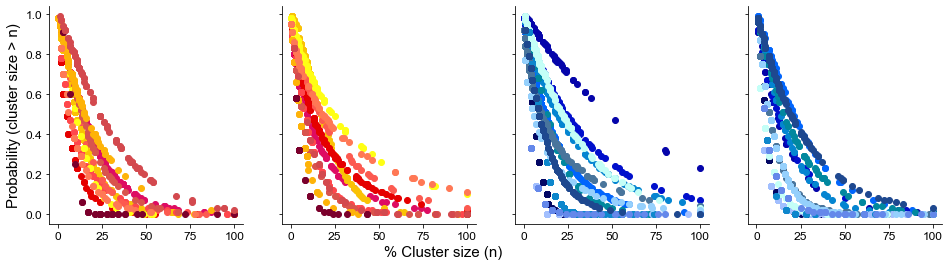

In [65]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharex = True, sharey=True)

axs[0].spines["right"].set_visible(False)
axs[1].spines["right"].set_visible(False)
axs[2].spines["right"].set_visible(False)
axs[3].spines["right"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[2].spines["top"].set_visible(False)
axs[3].spines["top"].set_visible(False)


axs[0].set_ylabel('Probability (cluster size > n)', fontsize=15, fontname = "Arial")
axs[1].set_xlabel('                               % Cluster size (n)', fontsize=15, fontname = "Arial")
axs[0].tick_params(labelsize=12)
axs[1].tick_params(labelsize=12)
axs[2].tick_params(labelsize=12)
axs[3].tick_params(labelsize=12)

#axs[0].set_ylim([-0.05,1.05])

p1 = axs[0].scatter(s2_1_cas, s2_1_a_cas, c= "xkcd:cerise")
p2 = axs[0].scatter(s2_2_cas, s2_2_a_cas, c= "xkcd:goldenrod")
p3 = axs[0].scatter(s2_4_cas, s2_4_a_cas, c= "xkcd:red")
p4 = axs[0].scatter(s2_11_cas, s2_11_a_cas, c= "xkcd:light red")
p5 = axs[0].scatter(s2_15_cas, s2_15_a_cas, c= "xkcd:coral")
p6 = axs[0].scatter(s2_16_cas, s2_16_a_cas, c= "xkcd:yellow")
p7 = axs[0].scatter(s3_1_cas, s3_1_a_cas, c= "xkcd:pale red")
p8 = axs[0].scatter(s3_2_cas, s3_2_a_cas, c= "xkcd:amber")
p9 = axs[0].scatter(s3_5_cas, s3_5_a_cas, c= "xkcd:melon")
p10 = axs[0].scatter(s3_6_cas, s3_6_a_cas, c= "xkcd:bordeaux")
p11 = axs[0].scatter(s3_9_cas, s3_9_a_cas, c= "xkcd:faded red")

p1 = axs[1].scatter(s2_1, s2_1_a, c= "xkcd:cerise")
p2 = axs[1].scatter(s2_2, s2_2_a, c= "xkcd:goldenrod")
p3 = axs[1].scatter(s2_4, s2_4_a, c= "xkcd:red")
p4 = axs[1].scatter(s2_11, s2_11_a, c= "xkcd:light red")
p5 = axs[1].scatter(s2_15, s2_15_a, c= "xkcd:coral")
p6 = axs[1].scatter(s2_16, s2_16_a, c= "xkcd:yellow")
p7 = axs[1].scatter(s3_1, s3_1_a, c= "xkcd:pale red")
p8 = axs[1].scatter(s3_2, s3_2_a, c= "xkcd:amber")
p9 = axs[1].scatter(s3_5, s3_5_a, c= "xkcd:melon")
p10 = axs[1].scatter(s3_6, s3_6_a, c= "xkcd:bordeaux")
p11 = axs[1].scatter(s3_9, s3_9_a, c= "xkcd:faded red")

p1 = axs[2].scatter(s2_5_cas, s2_5_a_cas, c= "xkcd:darkblue")
p2 = axs[2].scatter(s2_6_cas, s2_6_a_cas, c= "xkcd:bright blue")
p3 = axs[2].scatter(s2_7_cas, s2_7_a_cas, c= "xkcd:royal blue")
p4 = axs[2].scatter(s2_9_cas, s2_9_a_cas, c= "xkcd:true blue")
p5 = axs[2].scatter(s2_10_cas, s2_10_a_cas, c= "xkcd:cerulean")
p6 = axs[2].scatter(s2_13_cas, s2_13_a_cas, c= "xkcd:teal blue")
p7 = axs[2].scatter(s2_14_cas, s2_14_a_cas, c= "xkcd:pastel blue")
p8 = axs[2].scatter(s3_3_cas, s3_3_a_cas, c= "xkcd:dull blue")
p9 = axs[2].scatter(s3_4_cas, s3_4_a_cas, c= "xkcd:eggshell blue")
p10 = axs[2].scatter(s3_7_cas, s3_7_a_cas, c= "xkcd:water blue")
p11 = axs[2].scatter(s3_8_cas, s3_8_a_cas, c= "xkcd:light blue")
p12 = axs[2].scatter(s3_11_cas, s3_11_a_cas, c= "xkcd:soft blue")
p13 = axs[2].scatter(s3_12_cas, s3_12_a_cas, c= "xkcd:cobalt")

p1 = axs[3].scatter(s2_5, s2_5_a, c= "xkcd:darkblue")
p2 = axs[3].scatter(s2_6, s2_6_a, c= "xkcd:bright blue")
p3 = axs[3].scatter(s2_7, s2_7_a, c= "xkcd:royal blue")
p4 = axs[3].scatter(s2_9, s2_9_a, c= "xkcd:true blue")
p5 = axs[3].scatter(s2_10, s2_10_a, c= "xkcd:cerulean")
p6 = axs[3].scatter(s2_13, s2_13_a, c= "xkcd:teal blue")
p7 = axs[3].scatter(s2_14, s2_14_a, c= "xkcd:pastel blue")
p8 = axs[3].scatter(s3_3, s3_3_a, c= "xkcd:dull blue")
p9 = axs[3].scatter(s3_4, s3_4_a, c= "xkcd:eggshell blue")
p10 = axs[3].scatter(s3_7, s3_7_a, c= "xkcd:water blue")
p11 = axs[3].scatter(s3_8, s3_8_a, c= "xkcd:light blue")
p12 = axs[3].scatter(s3_11, s3_11_a, c= "xkcd:soft blue")
p13 = axs[3].scatter(s3_12, s3_12_a, c= "xkcd:cobalt")

fig.savefig('weibull X 4.pdf', dpi=800, bbox_inches='tight')

In [104]:
metafile= '/Users/giuliachiacchierini/Desktop/IPP paper/metafileIPP2_3.txt'
medfolder= '/Users/giuliachiacchierini/Desktop/IPP paper/MED-PC datafile/TEST 1/'

def DataExtract (metafile):
    f = open(metafile, 'r')
    f.seek(0)
    Rows = f.readlines()[1:]
    
    tablerows = []
    for i in Rows:
        tablerows.append(i.split('\t'))
        
        Medfile, Rat, Session, Diet, bottleL, bottleR, licksL, licksR, \
        TotalLicks, IntakeL, IntakeR = [], [], [], [], [], [], [], [], [], [], []
        
    for i, list in enumerate(tablerows):
        Medfile = Medfile + [list[0]]
        Rat = Rat + [list[1]]
        Session = Session + [list[2]]
        Diet = Diet + [list[3]]
        bottleL = bottleL + [list[4]]
        bottleR = bottleR + [list[5]]
        licksL = licksL + [list[6]]
        licksR = licksR + [list[7]]
        TotalLicks = TotalLicks + [list[8]]
        IntakeL = IntakeL + [list[9]]
        IntakeR = IntakeR + [list[10]]
            
    return ({'Medfile':Medfile, 'Rat':Rat, 'Session':Session, \
             'Diet':Diet, 'bottleL':bottleL, 'bottleR':bottleR, 'licksL':licksL, \
             'licksR':licksR, 'TotalLicks':TotalLicks, 'IntakeL':IntakeL, \
             'IntakeR':IntakeR})
    
Data = DataExtract(metafile)

Licks = []
for Medfile in Data['Medfile']:
    Licks.append(medfilereader(medfolder+Medfile,varsToExtract = ['b','e'], remove_var_header = True))

LLicks2 = []
for l in Licks:
    LLicks2.append(l[0])
RLicks2 = []
for l in Licks:
    RLicks2.append(l[1])

#lists of licks 
    
test1_C_NR = []
test1_M_NR = []
test1_C_PR = []
test1_M_PR = []

data  = pd.read_csv(metafile)


for rat in np.unique(Data['Rat']): #create a list of the rats in numerical order
    for index, session in enumerate(Data['Session']): #index the position in the Session list
        if session == 's4' :
            if Data['Rat'][index] == rat:
                if 'NR' in Data['Diet'][index]:
                    if 'cas' in Data ['bottleL'][index]:
                        test1_C_NR.append(LLicks2[index])
                    if 'cas' in Data ['bottleR'][index]:
                        test1_C_NR.append(RLicks2[index])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_NR.append(LLicks2[index])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_NR.append(RLicks2[index])
                if 'PR' in Data['Diet'][index]:
                    if 'cas' in Data['bottleL'][index]:
                        test1_C_PR.append(LLicks2[index])
                    if 'cas' in Data['bottleR'][index]:
                        test1_C_PR.append(RLicks2[index])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_PR.append(LLicks2[index])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_PR.append(RLicks2[index])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/giuliachiacchierini/Desktop/IPP paper/MED-PC datafile/TEST 1/!2018-10-09_08h18m.Subject IPP2.1'